# Data mining CSCI-B565 Project
# US Data Science Job Analysis
# Web scraped Linkedin job postings data
# This notebook is divided into following sections
1. Data Collection
2. Exploratory Data Analysis
3. Data preprocessing needed to solve problems mentioned next
4. Classify job description into different job roles
5. Job recommendation based on document similarity
6. Apriori analysis to determine skills often listed toghether to recommend skills training for job seekers for the roles

In [1]:
# Code for Data mining project Analysis of US Data Science Job market
# Data is stored in files in google drive - CSVdataAnalyst.csv, CSVFILE.csv, CSVML.csv, CSVstatisticalAnalyst, CSVresearcher.csv, CSVbigdataengineer.csv

In [2]:
!fusermount -u drive
!google-drive-ocamlfuse drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

/bin/bash: google-drive-ocamlfuse: command not found
Mounted at /content/drive


In [3]:
%cd drive/'My Drive'/

/content/drive/My Drive


In [4]:
# Imports for data frame and math opeerations
import pandas as pd
import numpy as np
import numpy

# Import for data visualizaition
import matplotlib.pyplot as plt

# For Us map plot
from bs4 import BeautifulSoup
import plotly.express as px

# Import to remove imbalance from data
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

# Import for neural network model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

#import requests

# Imports for data processing, scaling, PCA and machine learning stuff
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

# For text processing
import nltk
import re

# Read data 
data_analyst = pd.read_csv("CSVdataAnalyst.csv", encoding='cp1252')
data_scientist = pd.read_csv("CSVFILE.csv", encoding='cp1252')
data_ml = pd.read_csv("CSVML.csv", encoding='cp1252')
data_statisticalAnalyst = pd.read_csv("CSVstatisticalAnalyst.csv", encoding='cp1252')
data_researcher = pd.read_csv("CSVresearcher.csv", encoding='cp1252')
data_bigdata = pd.read_csv("CSVbigdataengineer.csv", encoding='cp1252')

In [5]:
# Combined all data in one data frame
combined_data = pd.concat([data_scientist, data_ml, data_statisticalAnalyst, data_researcher, data_analyst, data_bigdata])
combined_data_unique = combined_data.drop_duplicates().sort_index()

# Covert everthing to lower case
for columns in combined_data_unique.columns:
    combined_data_unique[columns] = combined_data_unique[columns].str.lower()

# Data Collection

In [6]:
'''
Code for extracting useful information from job description - education , major, skills, location, etc.
'''

# Extract skills
skills = ['python', ' r ', 'numpy','pandas', 'imapala','unix', 'pig', 'hbase', 'scikit-learn','java', 'seaborn','pyspark', 'kafka','postgres',' c ','c++','cpp','hadoop','spark', 'sql','spreadsheets', 'matlab','nosql','mongodb','scala','sas','html','css','javascript', 'powerpoint','aws','azure','tableau', 'cassandra','excel ','mysql','linux','hive','perl','tensorflow','pytorch','keras']
def extractSkill(x):
  skill_array = []
  for skill in skills:
    if(skill.lower() in x.lower()):
        skill_array.append(skill)
  if(skill_array==[]):
    skill_array.append("No requirement specified")
  return skill_array
combined_data_unique['skill'] =  combined_data_unique['description'].apply(lambda x: extractSkill(x))

# Extract domain
concepts = ['statistics','data visualization', 'cloud computing', 'distributed systems', ' ml ', ' ai ', "machine learning", "artificial intelligence", 'communication skills','mathematics','maths','critical thinking','data warehousing','problem solving','research','project management', ' bi ', 'business intelligence', 'etl', 'preprocessing','feature engineering','manipulation','probability', 'neural network', 'computer vision','deep learning','data mining','big data']
def extractConcept(x):
  concept_array = []
  for concept in concepts:
    if(concept.lower() in x.lower()):
        concept_array.append(concept)
  if(concept_array==[]):
    concept_array.append("No requirement specified")
  return concept_array
combined_data_unique['concept'] = combined_data_unique['description'].apply(lambda x: extractConcept(x))

# Extract education
education = ['bachelor','master',' ms ',' phd ','ph.d','m.s','b.s',' bs ','masters','bachelors','doctrate','postgraduate']
def extractEducation(x):
  education_array = []
  for edu in education:
    if(edu.lower() in x.lower()):
        education_array.append(edu)
  if(education_array==[]):
    education_array.append("No requirement specified")
  return education_array
combined_data_unique['education'] = combined_data_unique['description'].apply(lambda x: extractEducation(x))

# Extract major
majors = ['computer science','computer engineering','mathematics','maths','statistics','data science','datascience','engineering','machine learning','machine-learning','computer vision','electrical engineer',' ee ','applied math','finance']
def extractMajor(x):
  major_array = []
  for major in majors:
    if(major.lower() in x.lower()):
        major_array.append(major)
  if(major_array==[]):
    major_array.append("No requirement specified")
  return major_array
combined_data_unique['major'] = combined_data_unique['description'].apply(lambda x: extractMajor(x))

combined_data_unique.drop('description', 1)

,job_id,title,comapany,date,location,place,job_function,employment_type,industries,skill,concept,education,major
0,NaN,data scientist,the home depot,2021-11-19,united states,"atlanta, ga",NaN,full-time,NaN,[No requirement specified],[No requirement specified],[No requirement specified],[No requirement specified]
0,NaN,statistical analyst a/b,university of pennsylvania,2021-11-15,united states,"philadelphia, pa",analyst and other,full-time,higher education,[sas],"[statistics, research, manipulation]","[bachelor, master]",[statistics]
0,NaN,"researcher, the row",cnn,2021-11-19,united states,"atlanta, ga","research, analyst, and information technology",full-time,broadcast media production and distribution,[No requirement specified],[research],[No requirement specified],[No requirement specified]
0,2801690476,data analyst,webmasters4seo,2021-11-20,united states,united states,NaN,full-time,NaN,[No requirement specified],[business intelligence],[No requirement specified],[No requirement specified]
0,NaN,entry level big data engineer,comcast,2021-10-28,united states,"west chester, pa",engineering and information technology,full-time,"it services and it consulting, internet publis...","[python, unix, hadoop, spark, sql, scala, aws,...","[cloud computing, research]",[bachelor],[engineering]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,NaN,senior data scientist - machine learning [remote],hiroad,2021-11-19,united states,"conway, sc",engineering and information technology,full-time,insurance,"[python, numpy, pandas, scikit-learn, seaborn]","[machine learning, research]",[No requirement specified],"[data science, engineering, machine learning]"
964,NaN,senior data scientist - machine learning [remote],hiroad,2021-11-19,united states,"north myrtle beach, sc",engineering and information technology,full-time,insurance,"[python, numpy, pandas, scikit-learn, seaborn]","[machine learning, research]",[No requirement specified],"[data science, engineering, machine learning]"
965,NaN,senior data scientist - machine learning [remote],hiroad,2021-11-19,united states,"new orleans, la",engineering and information technology,full-time,insurance,"[python, numpy, pandas, scikit-learn, seaborn]","[machine learning, research]",[No requirement specified],"[data science, engineering, machine learning]"
966,NaN,data scientist intern – ibm garage - summit su...,ibm,2021-11-20,united states,"new york, ny",sales,full-time,computer hardware manufacturing,"[python, pandas, scikit-learn, spark, linux]","[statistics, data visualization, ai , machine...","[bachelor, master]","[computer science, statistics, data science, e..."


# Exploratory Data analysis

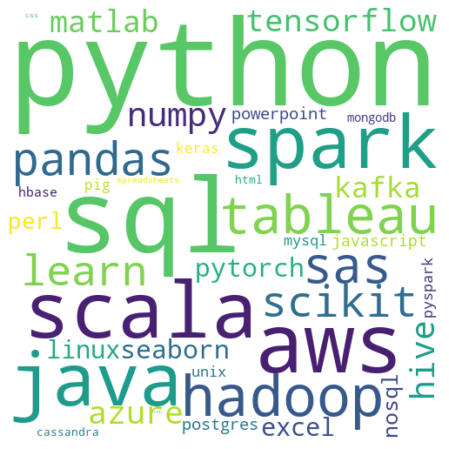

In [7]:
# Visualize important skills

skill_array = []
text=""
for skills in combined_data_unique['skill']:
  for skill in skills:
    if(skill=='No requirement specified'):
      continue
    if(skill=='excel'):
      skill_array.append(skill.strip())
    skill_array.append(skill.strip())

text += " ".join(skill_array)+" "

from PIL import Image
mask = np.array(Image.open("linkedin.png"))

plt.figure(figsize = (8, 8), facecolor = None)
from wordcloud import WordCloud
wc = WordCloud(background_color="white",max_font_size=256,
               random_state=42, width=500, height=500,collocations = False,max_words=2000).generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

<BarContainer object of 42 artists>

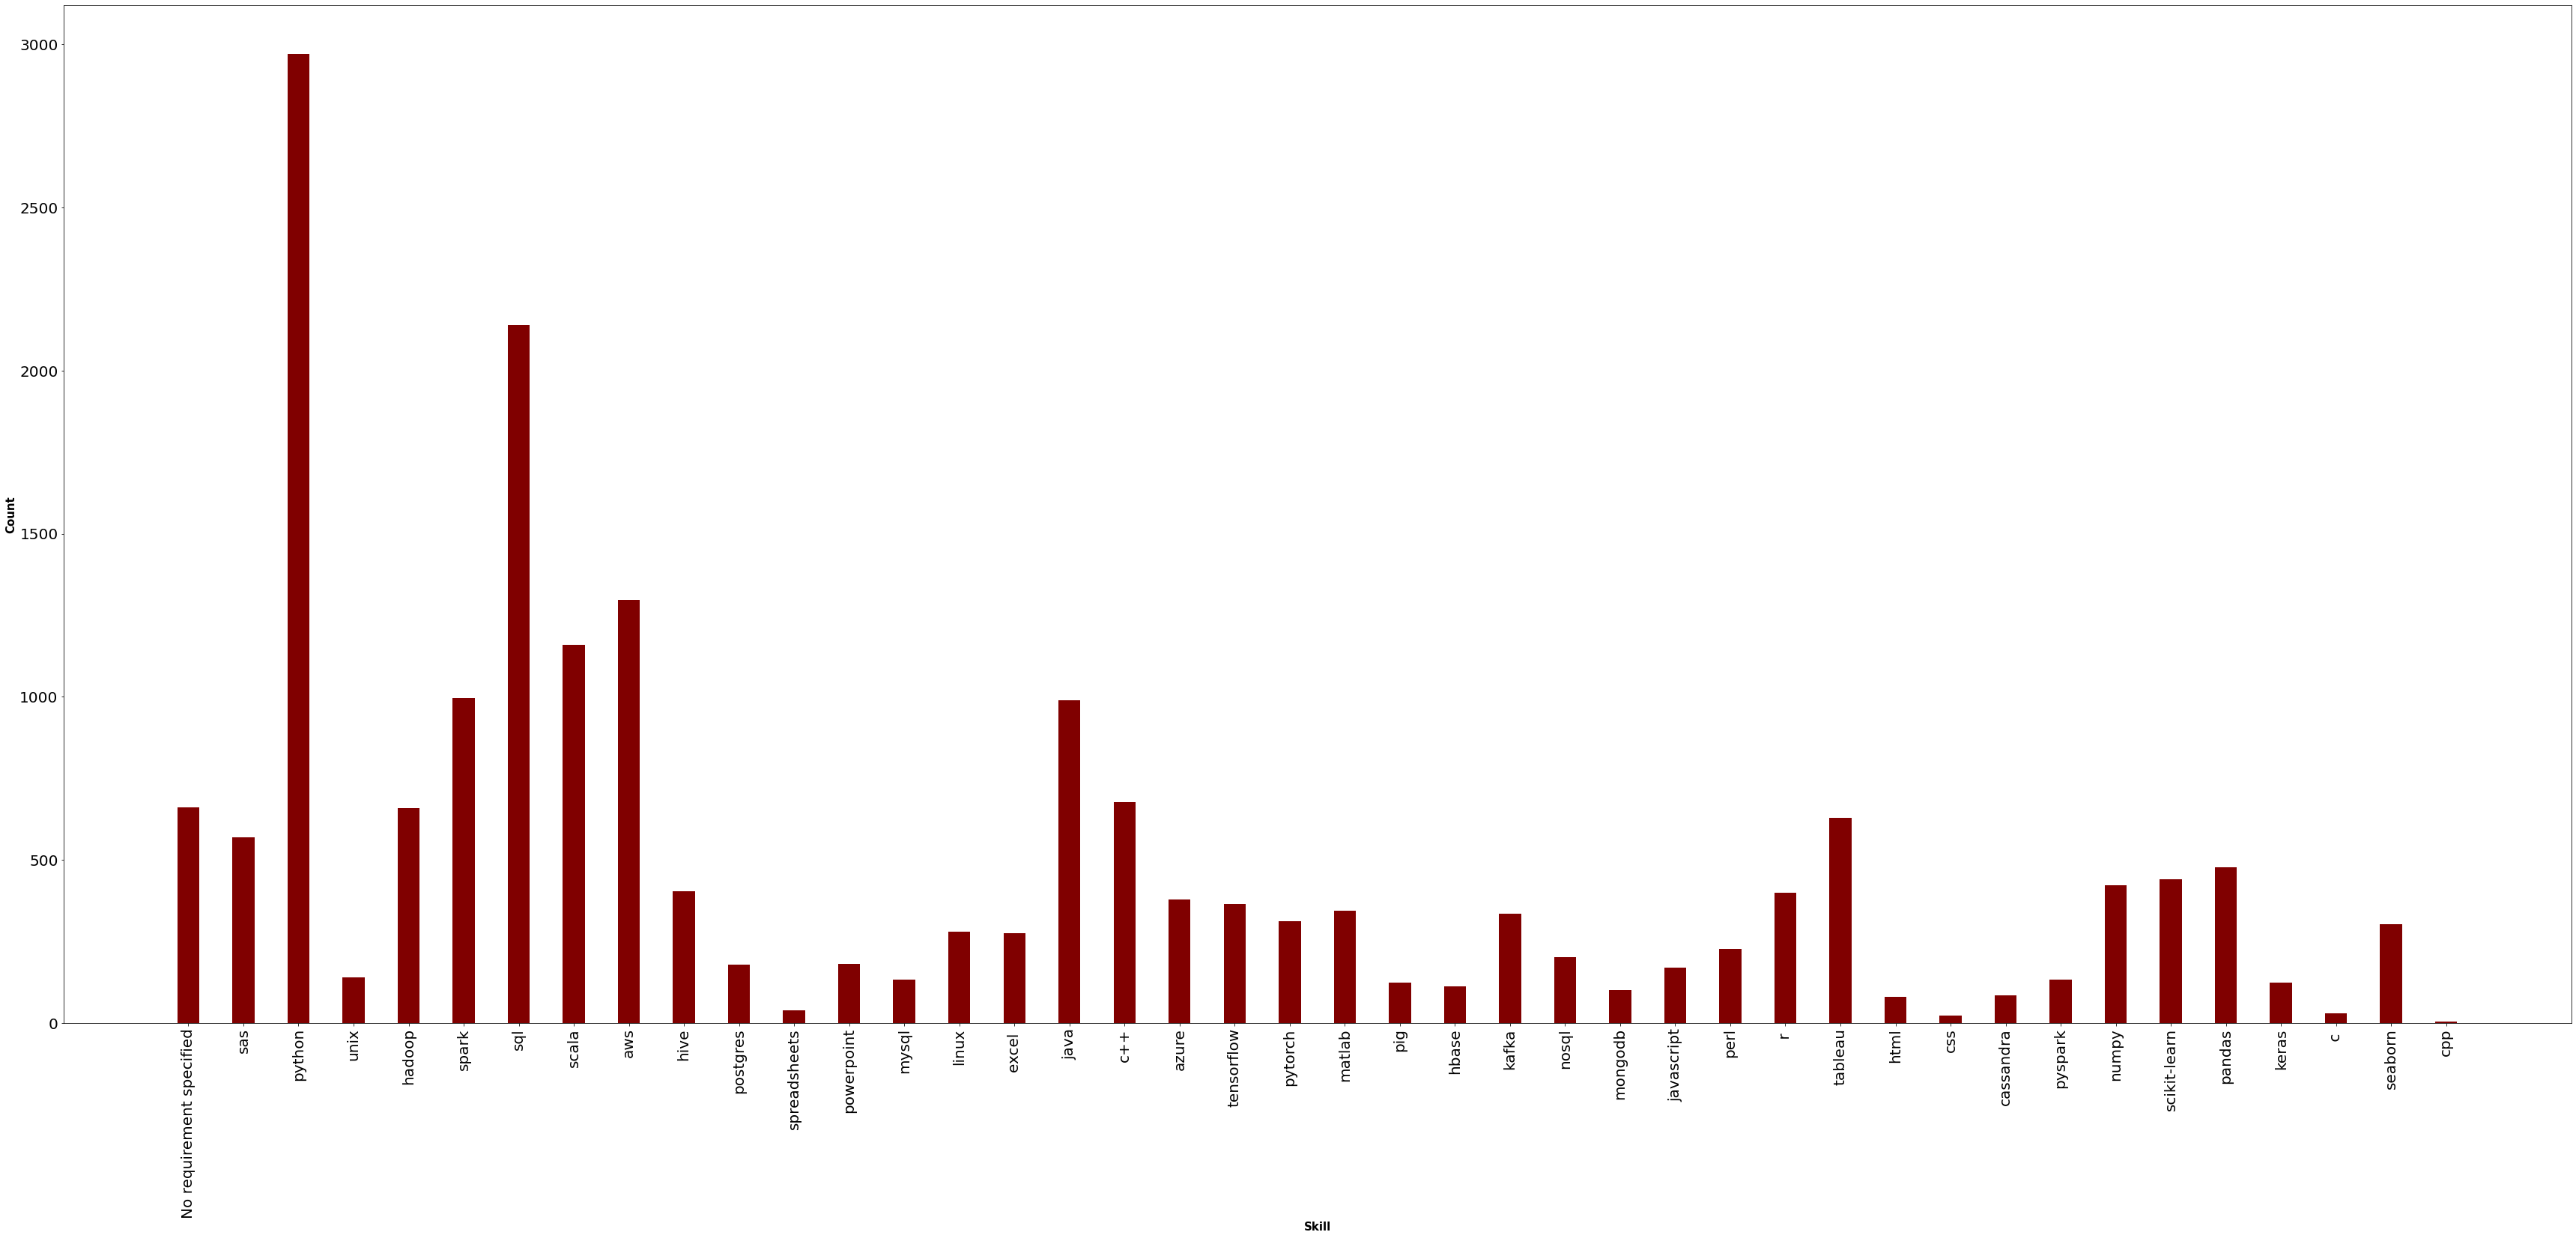

In [8]:
# Visualize count of skills listed

skill_count = {}
for skills in combined_data_unique['skill']:
  for skill in skills:
    if skill in skill_count:
      skill_count[skill] +=1
    else:
      skill_count.update({skill : 1})

skill_array = []
text=""
for skills in combined_data_unique['skill']:
  for skill in skills:
    if(skill=='No requirement specified'):
      continue
    skill_array.append(skill.strip())

text += " ".join(skill_array)+" "

skill = list(skill_count.keys())
values = list(skill_count.values())
  
fig = plt.figure(figsize = (60, 25))
plt.xlabel('Skill', fontweight ='bold', fontsize = 15)
plt.ylabel('Count', fontweight ='bold', fontsize = 15)
plt.xticks(fontsize=20,rotation='vertical')
plt.yticks(fontsize=20)
# creating the bar plot
plt.bar(skill, values, color ='maroon',
        width = 0.4)

<BarContainer object of 11 artists>

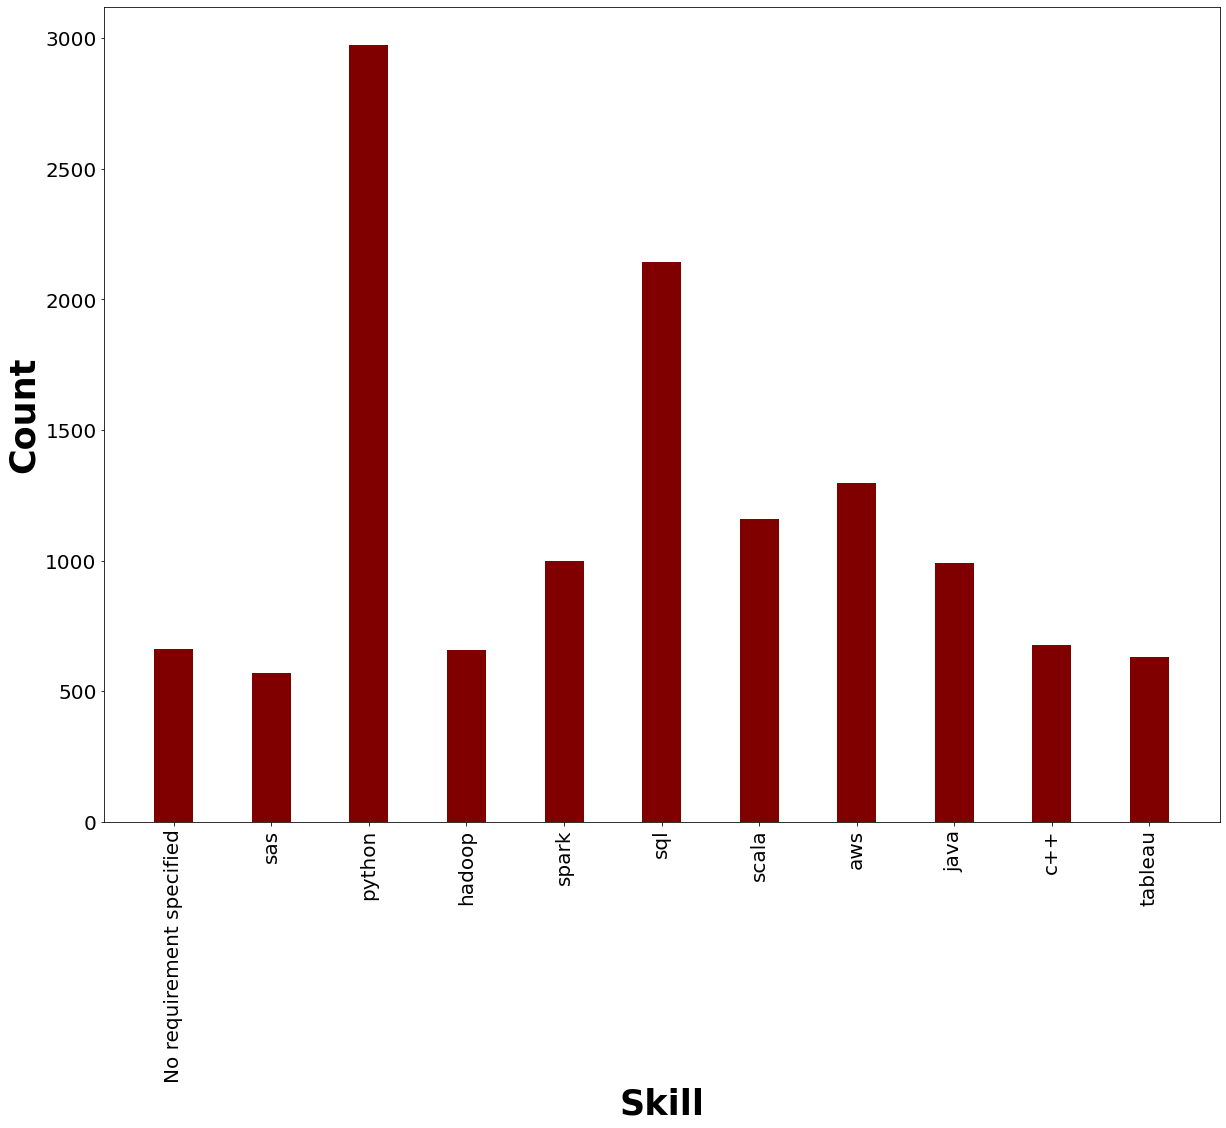

In [9]:
# Visualize skills with count>500

del_list = []
for skill in skill_count:
  
  if skill_count[skill] < 500:
      del_list.append(skill)

for i in del_list:
  del skill_count[i]


concept = list(skill_count.keys())
values = list(skill_count.values())
  
fig = plt.figure(figsize = (20, 15))
plt.xlabel('Skill', fontweight ='bold', fontsize = 35)
plt.ylabel('Count', fontweight ='bold', fontsize = 35)
plt.xticks(fontsize=20,rotation='vertical')
plt.yticks(fontsize=20)
# creating the bar plot
plt.bar(concept, values, color ='maroon',
        width = 0.4)

<BarContainer object of 9 artists>

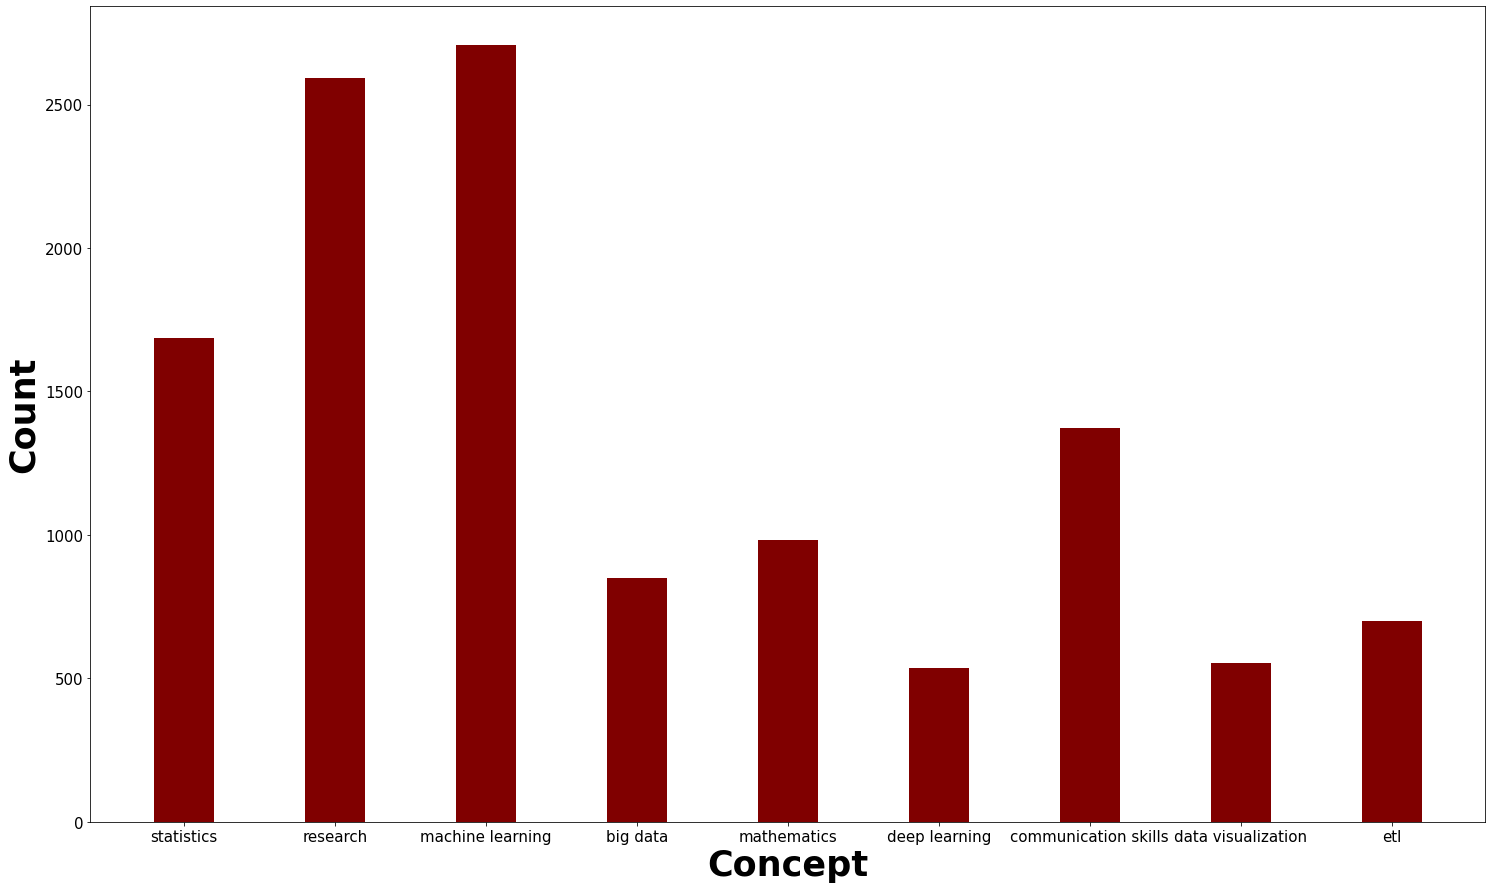

In [10]:
# Visualize domains/concepts listed with count>500

concept_count = {}
for concepts in combined_data_unique['concept']:
  for concept in concepts:
    if concept=='machine learning' or concept=='ml' or concept==' ml ':
      if 'machine learning' in concept_count:
        concept_count['machine learning']+=1
      else:
        concept_count['machine learning']=1
    elif concept in concept_count:
        concept_count[concept] +=1
    else:
      concept_count.update({concept : 1})

del_list = []
for concept in concept_count:
  
  if concept_count[concept] < 500:
      del_list.append(concept)

for i in del_list:
  del concept_count[i]

concept = list(concept_count.keys())
values = list(concept_count.values())
  
fig = plt.figure(figsize = (25, 15))
plt.xlabel('Concept', fontweight ='bold', fontsize = 35)
plt.ylabel('Count', fontweight ='bold', fontsize = 35)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# creating the bar plot
plt.bar(concept, values, color ='maroon',
        width = 0.4)

In [11]:
!pip3 install circlify

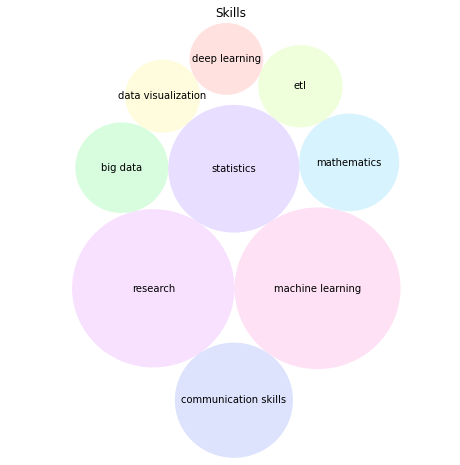

In [12]:
# Better visualization with circle packing chart
# Reference: https://www.python-graph-gallery.com/circular-packing-1-level-hierarchy/

import matplotlib.pyplot as plt
import seaborn as sns


df = pd.DataFrame({'Concept':concept,'Counts':values})

# import the circlify library
import circlify

# compute circle positions:
circles = circlify.circlify(
    df['Counts'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)


# import libraries
import circlify
import matplotlib.pyplot as plt

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(8,8))

# Skills
ax.set_title('Skills')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
df = df.sort_values("Counts")
labels = df['Concept']

# print circles
col = ['#ff7063','#fff457','#afff4d','#3bf55d','#3bc3f5','#5774f7','#8f5eff','#da6bff','#ff6bce','#f08d41']

for circle, label,k in zip(circles, labels,col):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, facecolor=k,alpha=0.2, linewidth=2))
    plt.annotate(
          label, 
          (x,y ) ,
          va='center',
          ha='center'
     )

<BarContainer object of 12 artists>

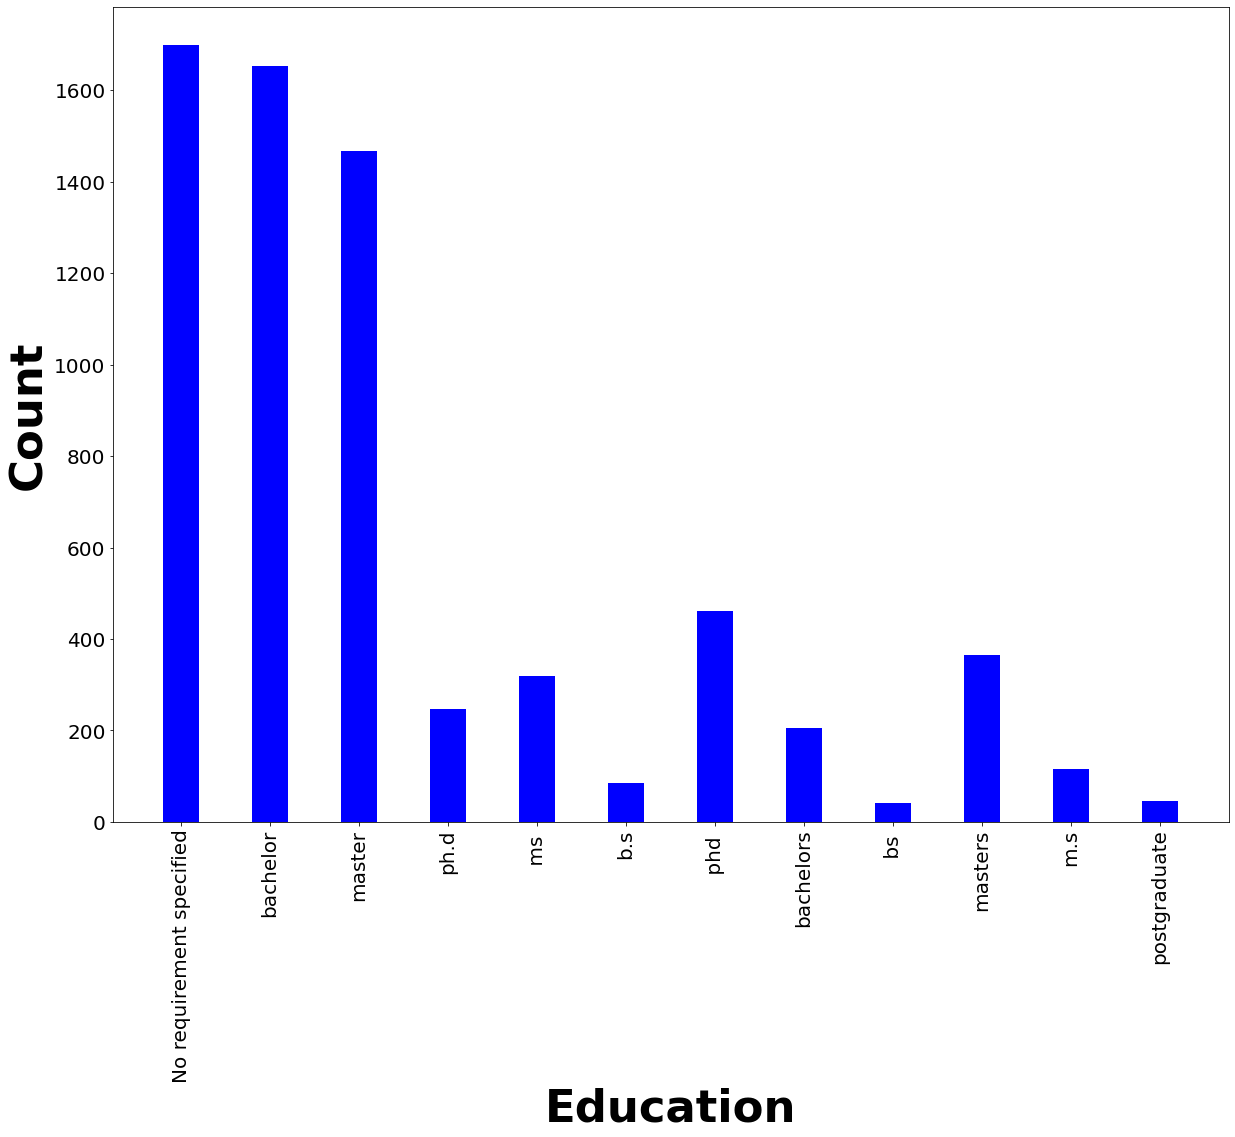

In [13]:
# Visualize education requirement

education_count = {}
for edu in combined_data_unique['education']:
  for edu1 in edu:
    if edu1 in education_count:
      education_count[edu1] +=1
    else:
      education_count.update({edu1 : 1})


education = list(education_count.keys())
values = list(education_count.values())
  
fig = plt.figure(figsize = (20, 15))
plt.xlabel('Education', fontweight ='bold', fontsize = 45)
plt.ylabel('Count', fontweight ='bold', fontsize = 45)
plt.xticks(fontsize=20,rotation='vertical')
plt.yticks(fontsize=20)
# creating the bar plot

plt.bar(education, values, color ='blue',
        width = 0.4)

<BarContainer object of 16 artists>

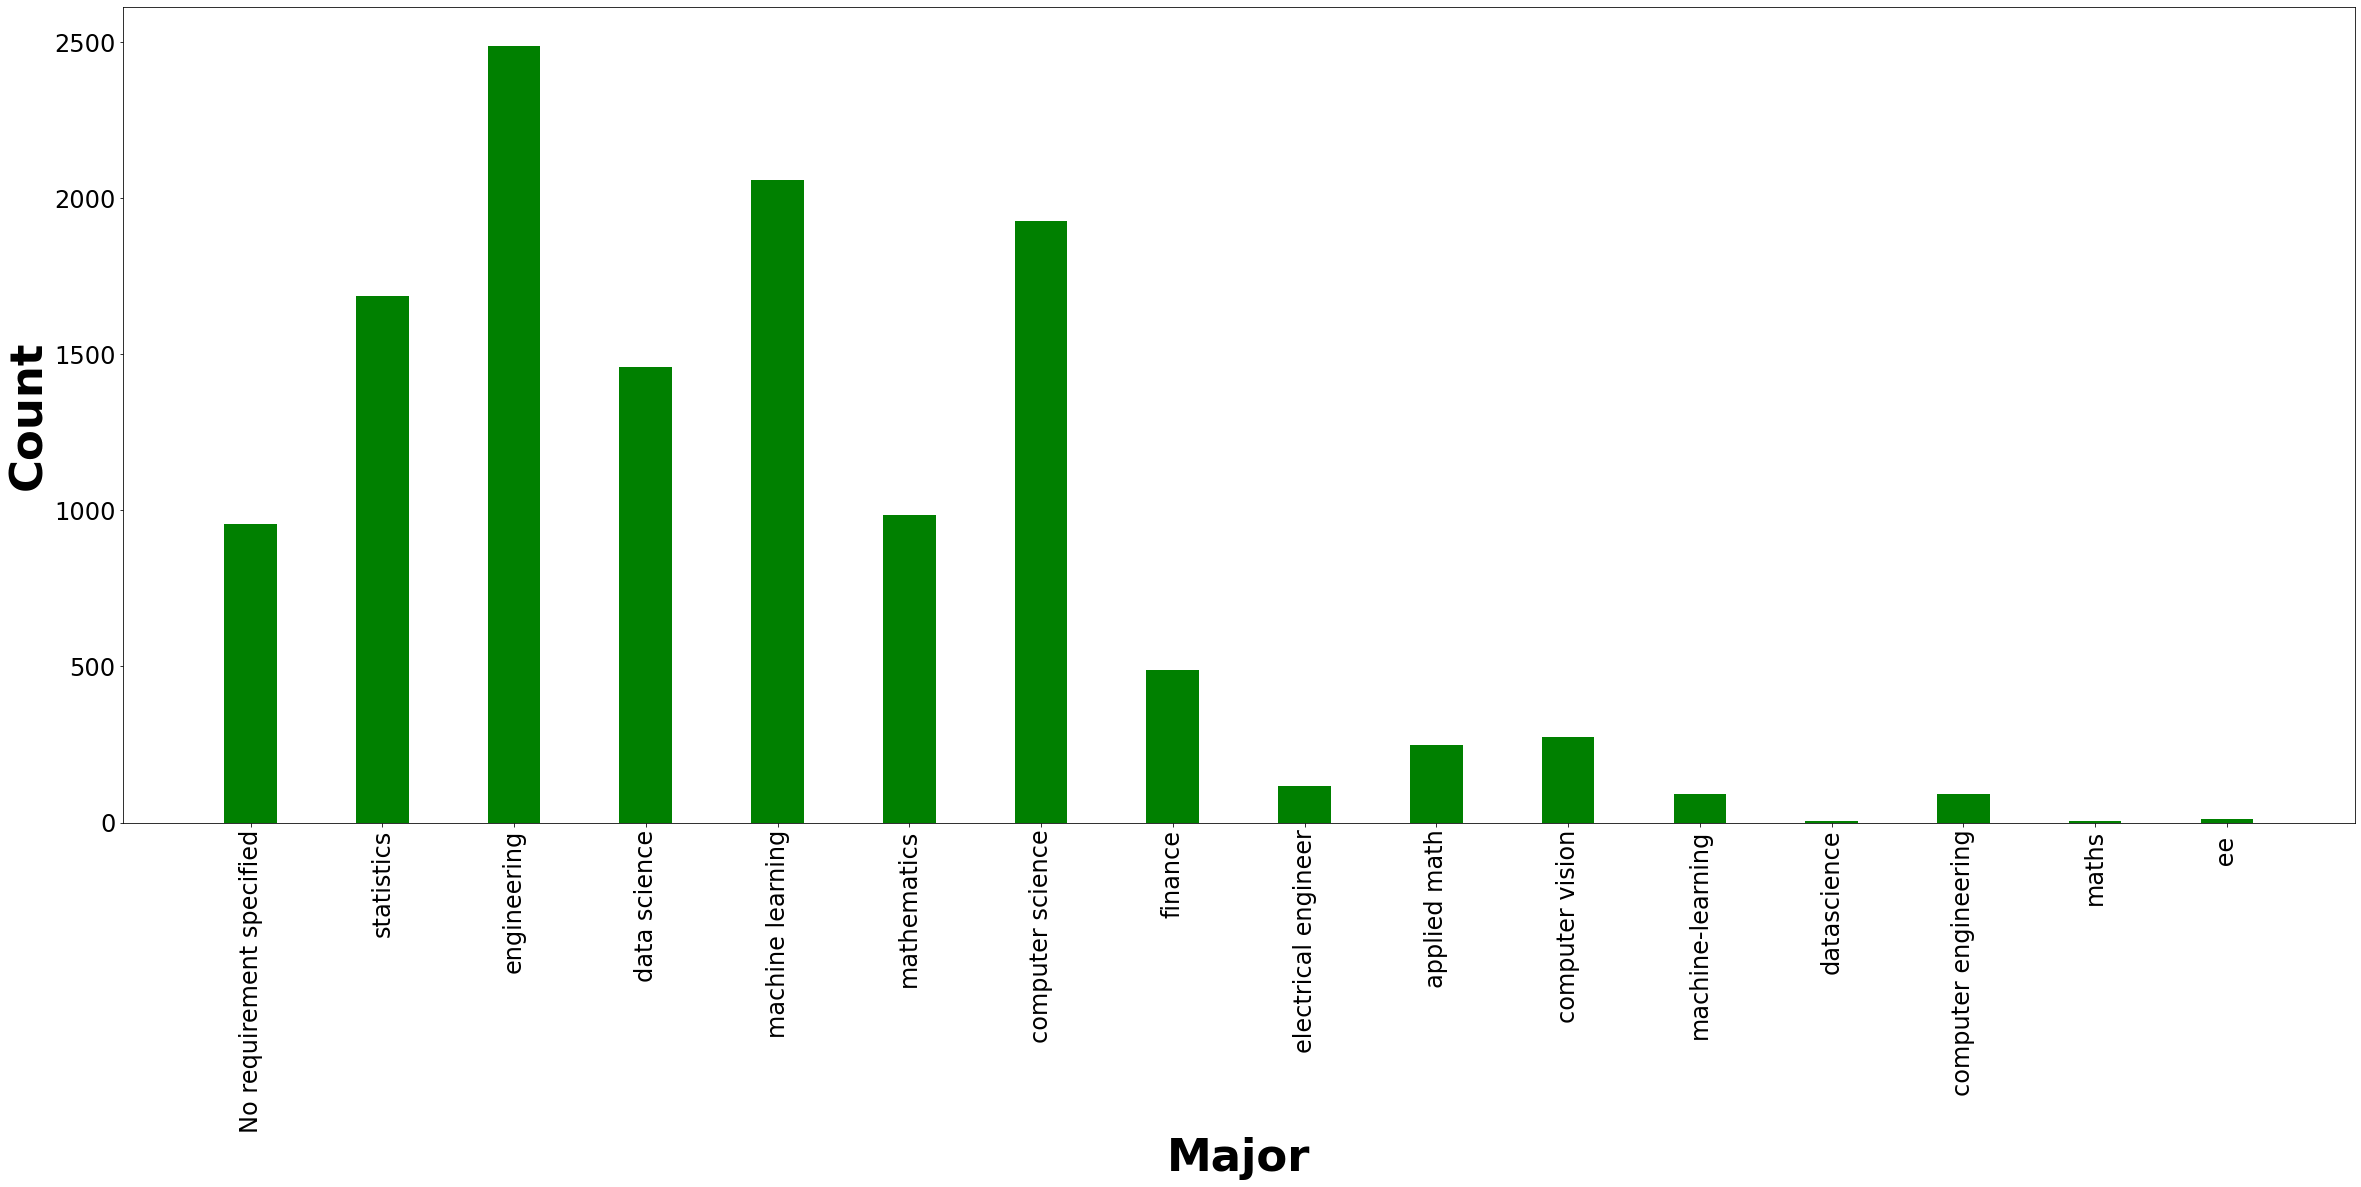

In [14]:
# Visualize major requirement

major_count = {}
for majors in combined_data_unique['major']:
  for major in majors:
    if major in major_count:
      major_count[major] +=1
    else:
      major_count.update({major : 1})



major = list(major_count.keys())
values = list(major_count.values())
  
fig = plt.figure(figsize = (40, 15))
plt.xlabel('Major', fontweight ='bold', fontsize = 45)
plt.ylabel('Count', fontweight ='bold', fontsize = 45)
plt.xticks(fontsize=24,rotation='vertical')
plt.yticks(fontsize=24)
# creating the bar plot
plt.bar(major, values, color ='green',
        width = 0.4)

<BarContainer object of 12 artists>

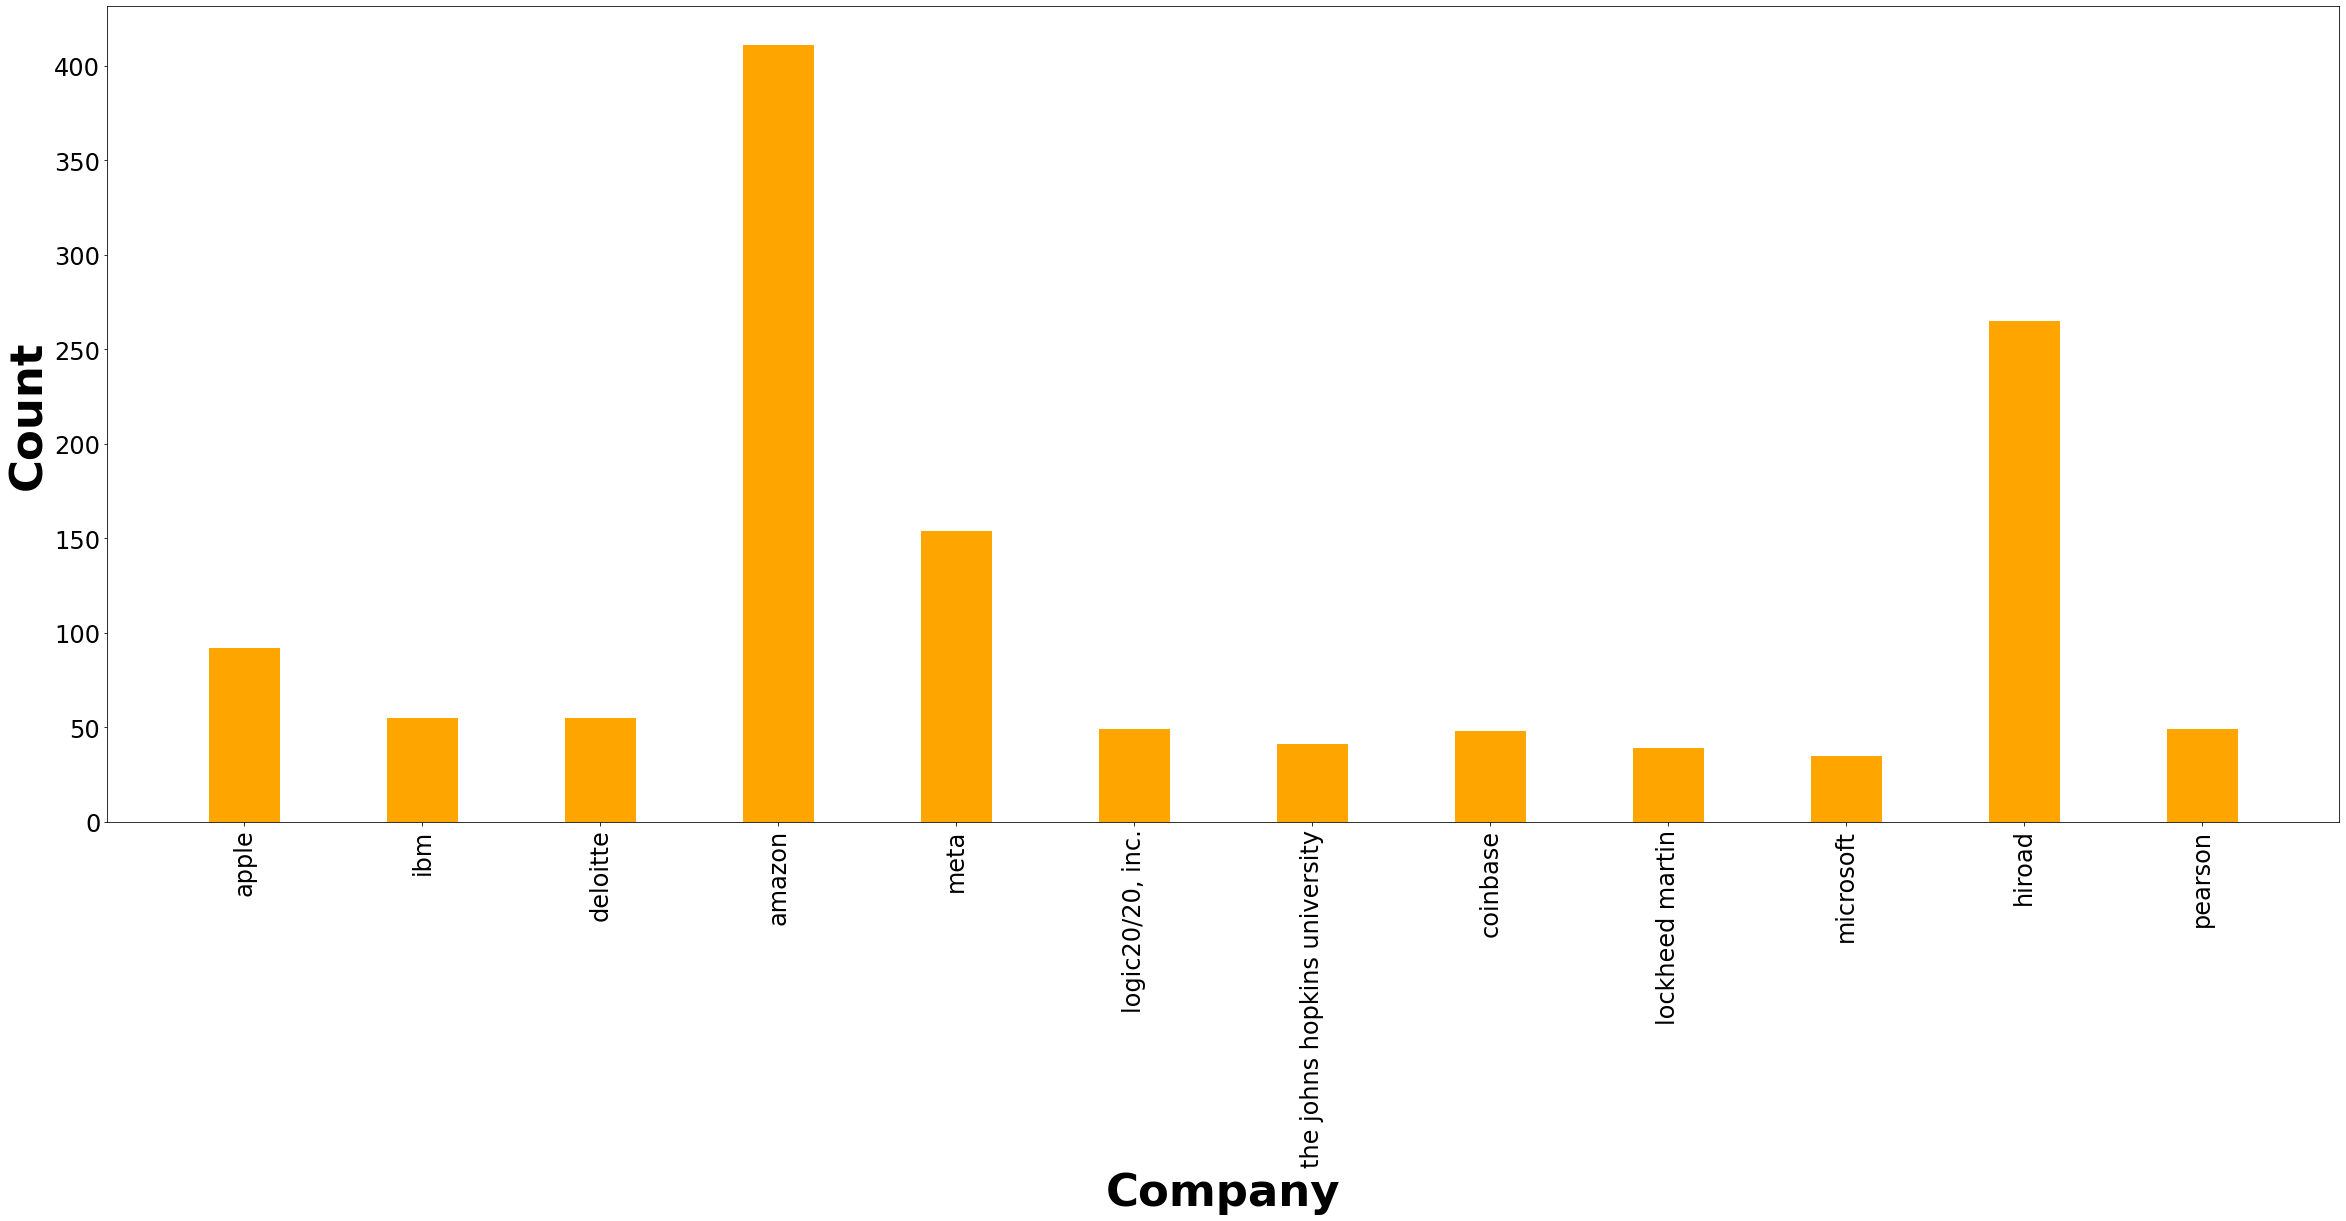

In [15]:
# Visualize company wise job postings count

company_count = {}
for comp in combined_data_unique['comapany']:
    if comp in company_count:
      company_count[comp] +=1
    else:
      company_count.update({comp : 1})


del_list = []

for company in company_count:
  
  if company_count[company] < 35:
      del_list.append(company)

for i in del_list:
  del company_count[i]


company = list(company_count.keys())
values = list(company_count.values())
  
fig = plt.figure(figsize = (40, 15))
plt.xlabel('Company', fontweight ='bold', fontsize = 45)
plt.ylabel('Count', fontweight ='bold', fontsize = 45)
plt.xticks(fontsize=24,rotation='vertical')
plt.yticks(fontsize=24)
# creating the bar plot
plt.bar(company, values, color ='orange',
        width = 0.4)

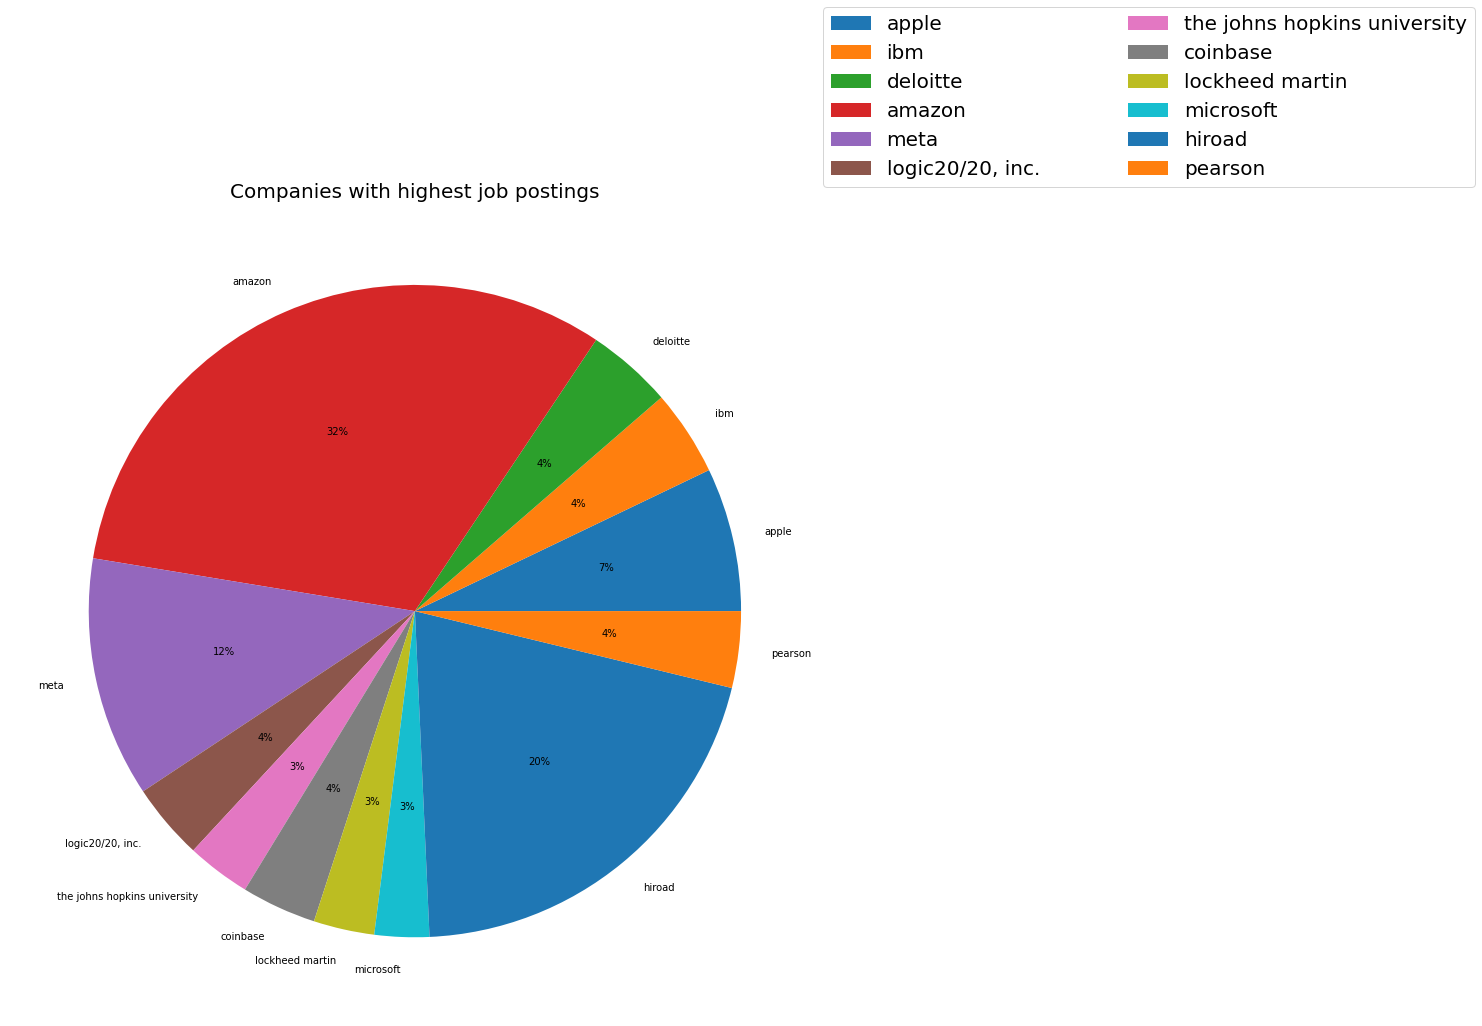

In [16]:
# Visualize company wise job postings count Pie chart

fig = plt.figure(figsize = (40, 15))
plt.pie(values,labels = company,autopct='%1.0f%%')
plt.title("Companies with highest job postings",fontsize=20)
plt.legend(bbox_to_anchor=(1., 1.02, 0.8, .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.,fontsize=20)

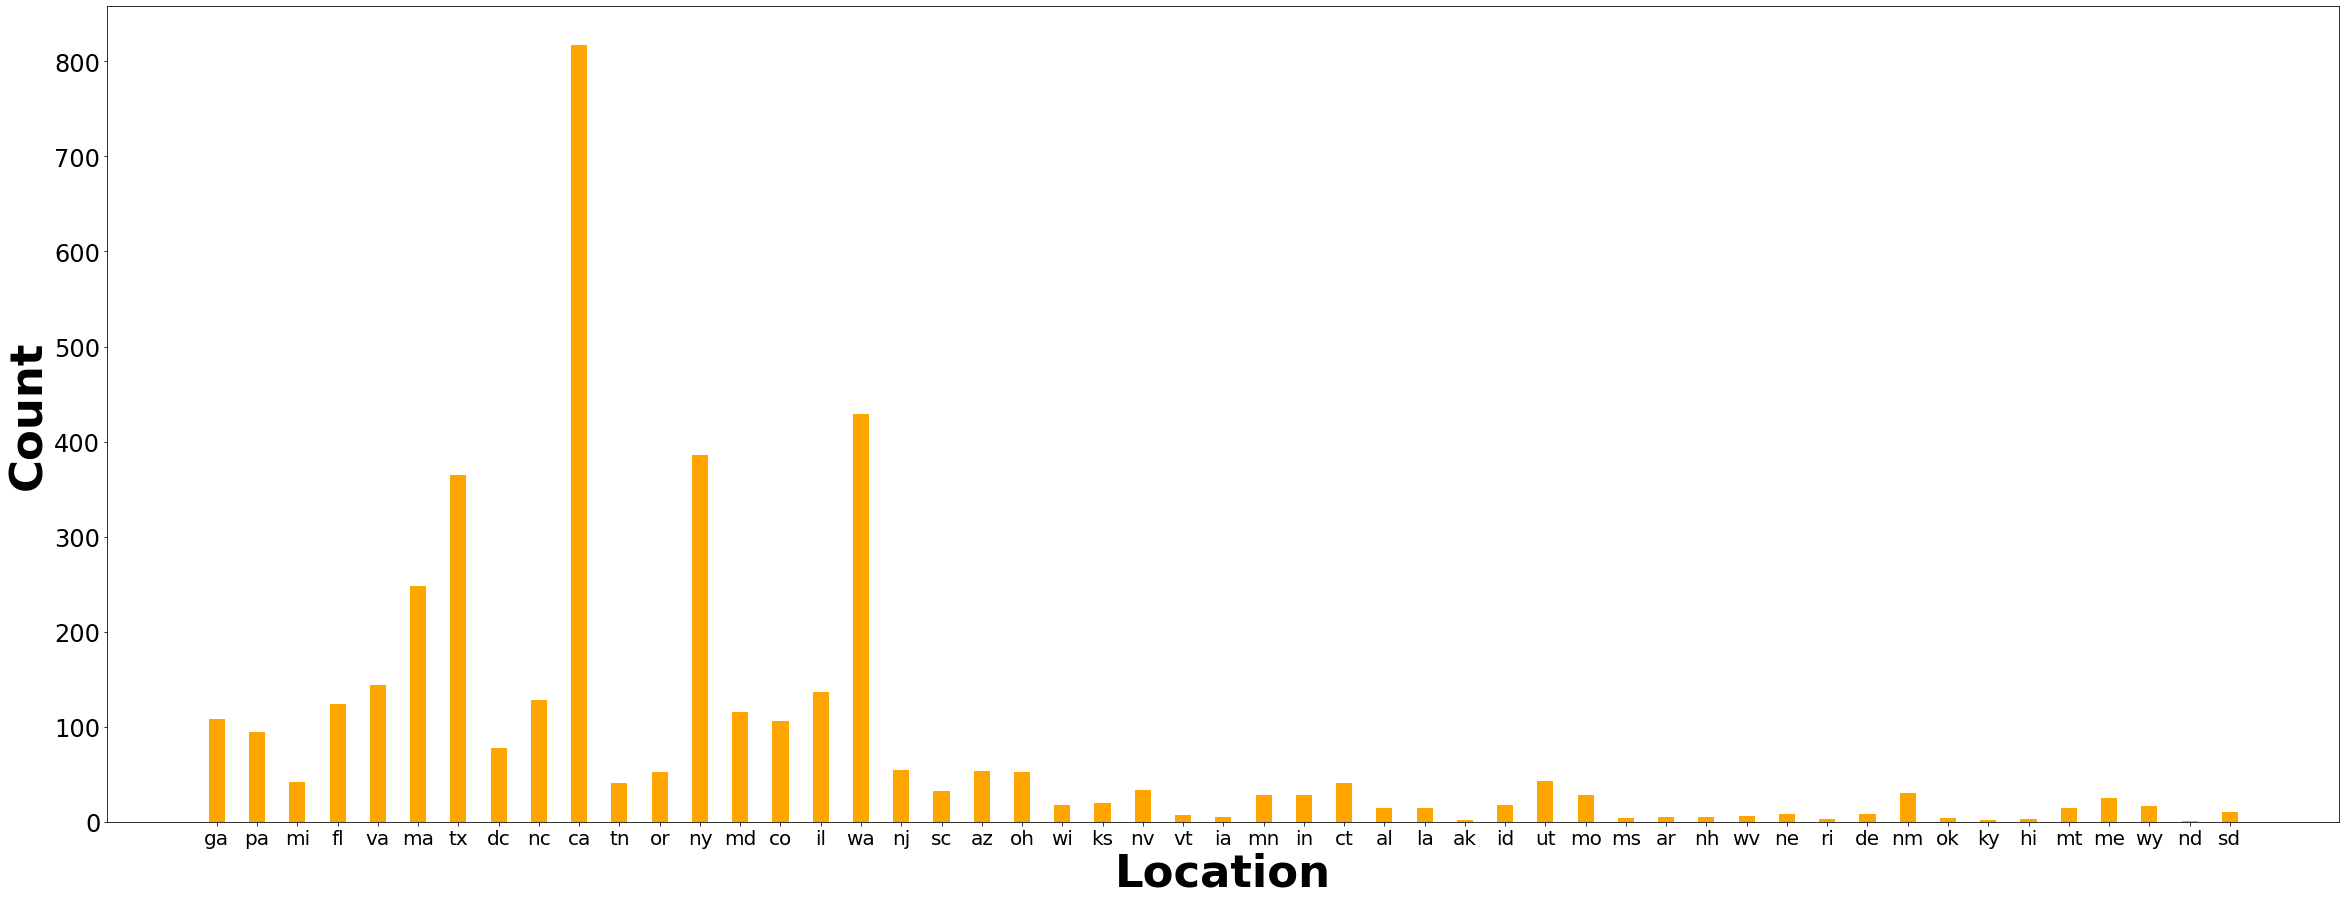

In [17]:
# Get state of job 

states = {"ALABAMA"	:"AL",
"ALASKA"	:"AK",
"AMERICAN SAMOA":	"AS",
"ARIZONA"	:"AZ",
"ARKANSAS":	"AR",
"CALIFORNIA":	"CA",
"COLORADO":	"CO",
"CONNECTICUT":	"CT",
"DELAWARE"	:"DE",
"DISTRICT OF COLUMBIA"	:"DC",
"FLORIDA":	"FL",
"GEORGIA"	:"GA",
"GUAM"	:"GU",
"HAWAII"	:"HI",
"IDAHO"	:"ID",
"ILLINOIS"	:"IL",
"INDIANA"	:"IN",
"IOWA"	:"IA",
"KANSAS"	:"KS",
"KENTUCKY":	"KY",
"LOUISIANA":	"LA",
"MAINE"	:"ME",
"MARYLAND":	"MD",
"MASSACHUSETTS":	"MA",
"MICHIGAN":	"MI",
"MINNESOTA":	"MN",
"MISSISSIPPI":	"MS",
"MISSOURI"	:"MO",
"MONTANA"	:"MT",
"NEBRASKA":	"NE",
"NEVADA"	:"NV",
"NEW HAMPSHIRE":	"NH",
"NEW JERSEY"	:"NJ",
"NEW MEXICO"	:"NM",
"NEW YORK"	:"NY",
"NORTH CAROLINA"	:"NC",
"NORTH DAKOTA"	:"ND",
"NORTHERN MARIANA IS":	"MP",
"OHIO"	:"OH",
"OKLAHOMA"	:"OK",
"OREGON"	:"OR",
"PENNSYLVANIA"	:"PA",
"PUERTO RICO"	:"PR",
"RHODE ISLAND"	:"RI",
"SOUTH CAROLINA"	:"SC",
"SOUTH DAKOTA"	:"SD",
"TENNESSEE"	:"TN",
"TEXAS"	:"TX",
"UTAH"	:"UT",
"VERMONT"	:"VT",
"VIRGINIA"	:"VA",
"VIRGIN ISLANDS"	:"VI",
"WASHINGTON"	:"WA",
"WEST VIRGINIA"	:"WV",
"WISCONSIN"	:"WI",
"WYOMING"	:"WY"}

states = {k.lower(): v.lower() for k, v in states.items()}

def getStateCode(place):
  states_array = []
  state1 = place.split(",")
  if(len(state1)>1):
    state = state1[1].strip()
    for state_code in states.values():
      if(state==state_code):
          states_array.append(state_code)
  return states_array

combined_data_unique['location_cleaned'] = combined_data_unique['place'].apply(lambda x: getStateCode(x))
combined_data_unique['location_cleaned']
location_count = {}
count=0
for loc in combined_data_unique['location_cleaned']:
    for loc1 in loc:
      if loc1 in location_count:
        location_count[loc1] +=1
      elif loc1 is not None:
        count+=1
        location_count.update({loc1 : 1})


location = list(location_count.keys())
values = list(location_count.values())
  
fig = plt.figure(figsize = (40, 15))
plt.xlabel('Location', fontweight ='bold', fontsize = 45)
plt.ylabel('Count', fontweight ='bold', fontsize = 45)
plt.xticks(fontsize=20)
plt.yticks(fontsize=24)
# creating the bar plot
plt.bar(location, values, color ='orange',width = 0.4)

location_count = {}
count=0
for loc in combined_data_unique['location_cleaned']:
    for loc1 in loc:
      if loc1 in location_count:
        location_count[loc1] +=1
      elif loc1 is not None:
        count+=1
        location_count.update({loc1 : 1})

loc = location_count.keys()
loc_upper = [elem.upper() for elem in list(loc) ]
df = pd.DataFrame({'State_code':loc_upper,'Counts':location_count.values()})


# US map plot
import plotly.figure_factory as ff
import plotly

fig = px.choropleth(df,
                    locations='State_code',
                    color='Counts',
                    color_continuous_scale='spectral_r',
                    labels='State_code',
                    locationmode='USA-states',
                    title='State wise data science job postings in US',
                    scope='usa')
plotly.offline.plot(fig,filename="test.html")
df = pd.DataFrame({'State_code':loc_upper,'Counts':location_count.values()})

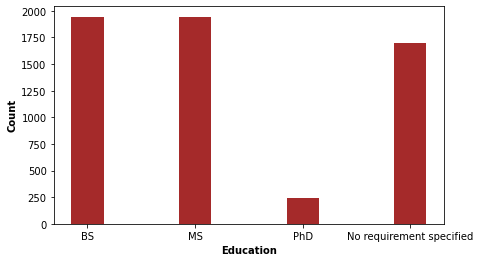

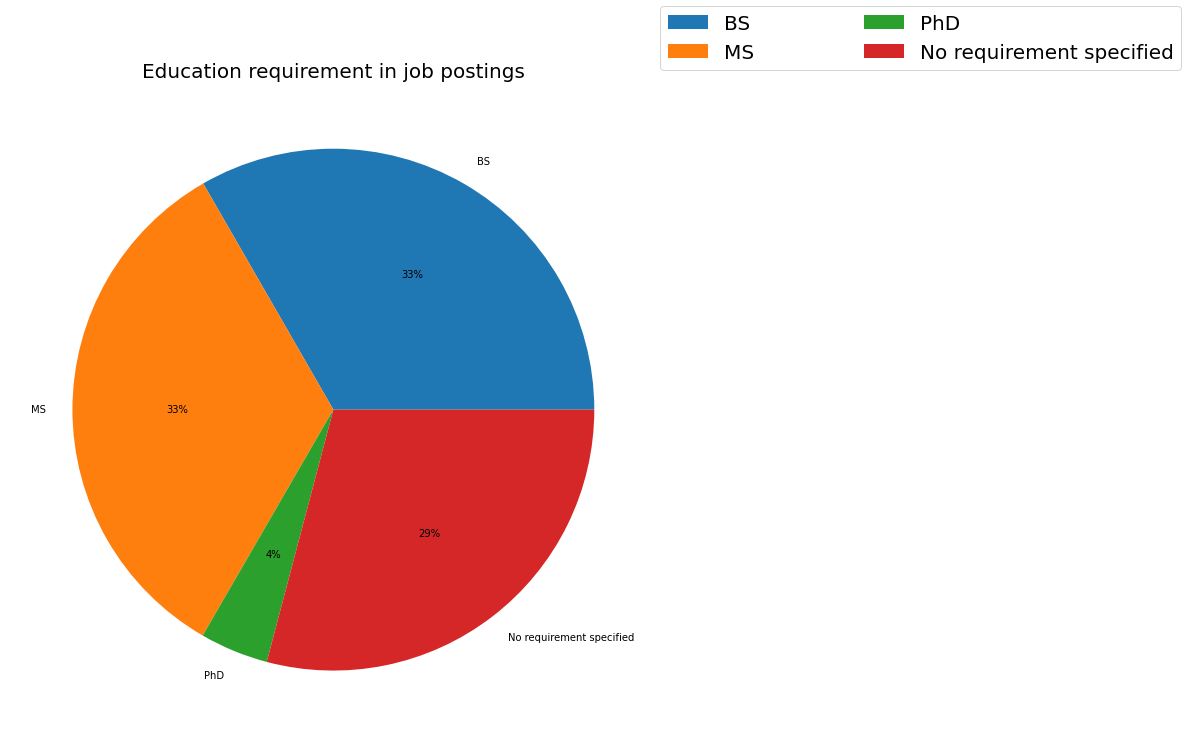

In [18]:
# Remove inconsistent values like Masters Master MS by combining in one.
# Aggregate to get counts


def filter(dataframe, filter_name):
  filter_count = {}
  combined_data_unique = dataframe
  for fil in combined_data_unique[filter_name]:
    if(fil is not None):
      for fil1 in fil:
        if fil1 in filter_count:
          filter_count[fil1] +=1
        else:
          filter_count.update({fil1 : 1})
  return filter_count

def filter_loc(dataframe, filter_name):
  filter_count = {}
  combined_data_unique = dataframe
  for fil in combined_data_unique[filter_name]:
    if(fil is not None):
        if fil in filter_count:
          filter_count[fil] +=1
        else:
          filter_count.update({fil : 1})
  return filter_count


def filter_company(dataframe, filter_name):
  filter_count = {}
  combined_data_unique = dataframe
  for fil in combined_data_unique[filter_name]:
    if(fil is not None):
        if fil in filter_count:
          filter_count[fil] +=1
        else:
          filter_count.update({fil : 1})
  return filter_count


def aggregate(dict):
  aggregated_dict = {}
  aggregated_dict['BS'] = 0
  aggregated_dict['MS'] = 0
  aggregated_dict['PhD'] = 0
  aggregated_dict['No requirement specified'] = 0
  if("bachelor" in dict):
    aggregated_dict['BS']+=dict['bachelor']
  if("bachelors" in dict):
    aggregated_dict['BS']+=dict['bachelors']  
  if("b.s" in dict):
    aggregated_dict['BS']+=dict['b.s']
  if("master" in dict):
    aggregated_dict['MS']+=dict['master']
  if("masters" in dict):
    aggregated_dict['MS']+=dict['masters']  
  if("ms" in dict):
    aggregated_dict['MS']+=dict['ms']  
  if("m.s" in dict):
    aggregated_dict['MS']+=dict['m.s']  
  if("doctrate" in dict):
    aggregated_dict['PhD']+=dict['doctrate']
  if("phd" in dict):
    aggregated_dict['PhD']+=dict['phd']
  if("ph.d" in dict):
    aggregated_dict['PhD']+=dict['ph.d']
  if("No requirement specified" in dict):
    aggregated_dict['No requirement specified']+=dict['No requirement specified']
  return aggregated_dict


# Education requirement histogram
education = ['bachelor','master',' ms ',' phd ','ph.d','m.s','b.s',' bs ','masters','bachelors','doctrate','postgraduate']

def plot(filter_count,xlabel1,ylabel1,color1):

  education = list(filter_count.keys())
  values = list(filter_count.values())
    
  fig = plt.figure(figsize = (40, 25))
  plt.xlabel(xlabel1, fontweight ='bold', fontsize = 45)
  plt.ylabel(ylabel1, fontweight ='bold', fontsize = 45)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=24)
  plt.bar(education, values, color =color1,width = 0.4)

education_filter = filter(combined_data_unique,'education')
education_filter = aggregate(education_filter)

education = list(education_filter.keys())
values = list(education_filter.values())
  
fig = plt.figure(figsize = (7, 4))
plt.xlabel('Education', fontweight ='bold')
plt.ylabel('Count', fontweight ='bold')

# Bar plot

plt.bar(education, values, color ='brown',
        width = 0.3)

# Pie plot
fig = plt.figure(figsize = (20, 12))
plt.pie(values,labels = education,autopct='%1.0f%%')
plt.title("Education requirement in job postings",fontsize=20)
plt.legend(bbox_to_anchor=(1., 1.02, 0.8, .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.,fontsize=20)

{'BS': 181, 'MS': 206, 'PhD': 45, 'No requirement specified': 395}


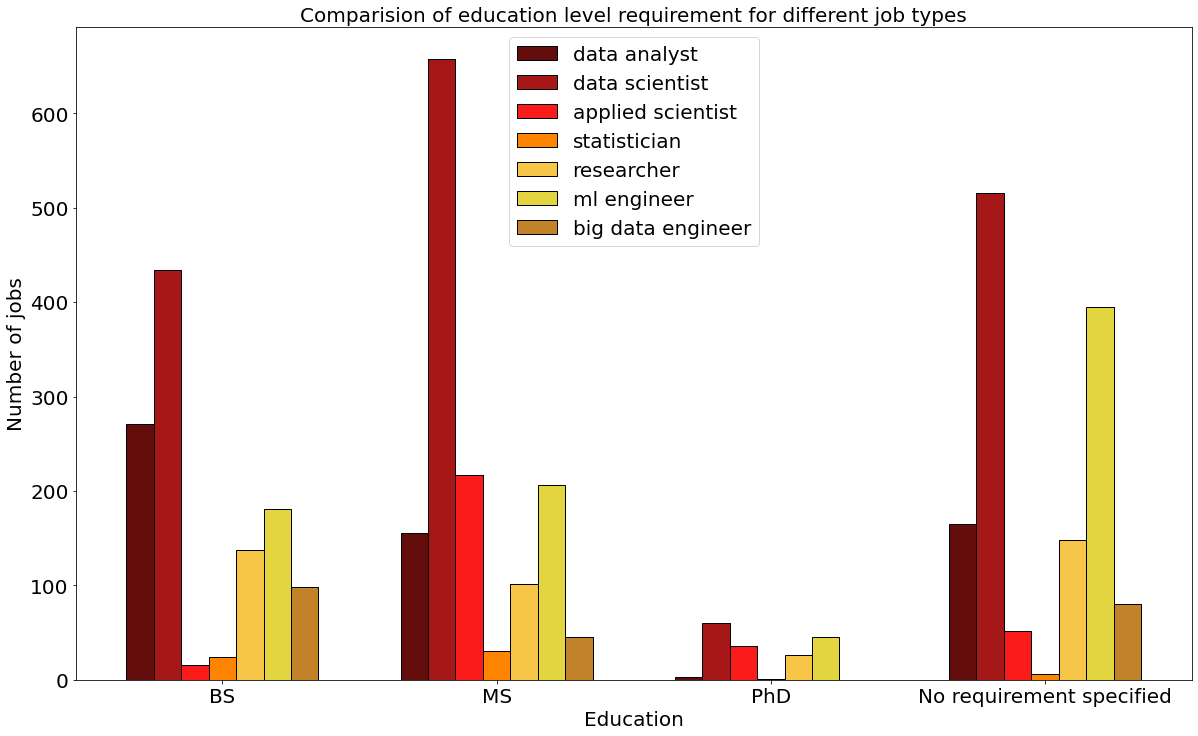

In [19]:
# Comparison of education requirement for different job types
data_analyst = combined_data_unique[combined_data_unique['title'].str.contains('data analyst')]
data_analyst_education_filter = filter(data_analyst,'education')
data_analyst_education_filter = aggregate(data_analyst_education_filter)

applied_scientist = combined_data_unique[combined_data_unique['title'].str.contains('applied scientist')]
applied_scientist_education_filter = filter(applied_scientist,'education')
applied_scientist_education_filter = aggregate(applied_scientist_education_filter)

data_scientist = combined_data_unique[combined_data_unique['title'].str.contains('data scientist')]
data_scientist_education_filter = filter(data_scientist,'education')
data_scientist_education_filter = aggregate(data_scientist_education_filter)

statistician = combined_data_unique[combined_data_unique['title'].str.contains('statistical analyst')]
statistician_education_filter = filter(statistician,'education')
statistician_education_filter = aggregate(statistician_education_filter)

researcher = combined_data_unique[combined_data_unique['title'].str.contains('researcher')]
researcher_education_filter = filter(researcher,'education')
researcher_education_filter = aggregate(researcher_education_filter)

big_data_engineer = combined_data_unique[combined_data_unique['title'].str.contains('big data')]
big_data_engineer_education_filter = filter(big_data_engineer,'education')
big_data_engineer_education_filter = aggregate(big_data_engineer_education_filter)

ml = combined_data_unique[combined_data_unique['title'].str.contains('machine learning')]
ml_education_filter = filter(ml,'education')
ml_education_filter = aggregate(ml_education_filter)
print(ml_education_filter)
   
dataanalyst_values = data_analyst_education_filter.values()
data_scientist_values = data_scientist_education_filter.values()
applied_scientist_education_values = applied_scientist_education_filter.values()
statistician_education_values = statistician_education_filter.values()
researcher_education_values = researcher_education_filter.values()
ml_education_filter_values = ml_education_filter.values()
big_data_engineer_education_filter_values = big_data_engineer_education_filter.values()
n=len(ml_education_filter_values)
r = np.arange(n)
width = 0.1
  
fig = plt.figure(figsize = (20, 12))
plt.bar(r, dataanalyst_values, color = '#630d0d',
        width = width, edgecolor = 'black',
        label='data analyst')
plt.bar(r + width, data_scientist_values, color = '#a61717',
        width = width, edgecolor = 'black',
        label='data scientist')
plt.bar(r + 2*width, applied_scientist_education_values, color = '#fa1b1b',
        width = width, edgecolor = 'black',
        label='applied scientist')
plt.bar(r + 3*width, statistician_education_values, color = '#ff8400',
        width = width, edgecolor = 'black',
        label='statistician')
plt.bar(r + 4*width, researcher_education_values, color = '#f7c648',
        width = width, edgecolor = 'black',
        label='researcher')
plt.bar(r + 5*width, ml_education_filter_values, color = '#e3d540',
        width = width, edgecolor = 'black',
        label='ml engineer')
plt.bar(r + 6*width, big_data_engineer_education_filter_values, color = '#c28229',
        width = width, edgecolor = 'black',
        label='big data engineer')
  
plt.xlabel("Education",fontsize=20)
plt.ylabel("Number of jobs",fontsize=20)
plt.title("Comparision of education level requirement for different job types",fontsize=20)
  
# plt.grid(linestyle='--')
plt.xticks(r + 3*width,['BS','MS','PhD','No requirement specified'],fontsize=20)
plt.legend(loc=9, prop={'size': 20})
plt.yticks(fontsize=20)
plt.show()

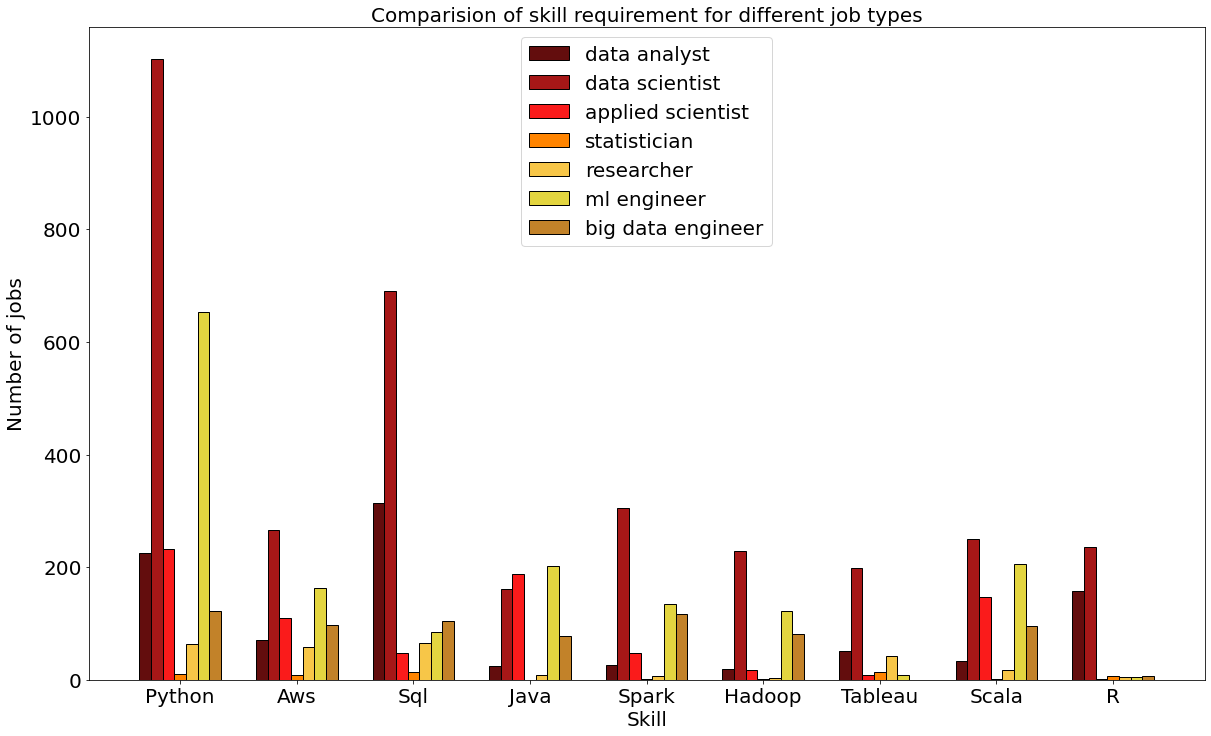

In [20]:
# Comparison of skills requirement for different job types

def aggregate_skill(dict):
  aggregated_dict = {}
  aggregated_dict['Python'] = 0
  aggregated_dict['Aws'] = 0
  aggregated_dict['Sql'] = 0
  aggregated_dict['Java'] = 0
  aggregated_dict['Spark'] = 0
  aggregated_dict['Hadoop'] = 0
  aggregated_dict['R'] = 0
  aggregated_dict['Scala'] = 0
  aggregated_dict['Tableau'] = 0

  if("python" in dict):
    aggregated_dict['Python']+=dict['python']
  if("Python" in dict):
    aggregated_dict['Python']+=dict['Python']
  if("aws" in dict):
    aggregated_dict['Aws']+=dict['aws']
  if("sql" in dict):
    aggregated_dict['Sql']+=dict['sql']
  if("java" in dict):
    aggregated_dict['Java']+=dict['java']
  if("spark" in dict):
    aggregated_dict['Spark']+=dict['spark']
  if("hadoop" in dict):
    aggregated_dict['Hadoop']+=dict['hadoop']
  if("tableau" in dict):
    aggregated_dict['Tableau']+=dict['tableau'] 
  if("scala" in dict):
    aggregated_dict['Scala']+=dict['scala']    
  if(" r " in dict):
    aggregated_dict['R']+=dict[' r ']
  return aggregated_dict

data_scientist = combined_data_unique[combined_data_unique['title'].str.contains('data scientist')]
data_scientist_skill_filter = filter(data_scientist,'skill')
data_scientist_skill_filter = aggregate_skill(data_scientist_skill_filter)

data_analyst = combined_data_unique[combined_data_unique['title'].str.contains('data analyst')]
data_analyst_skill_filter = filter(data_analyst,'skill')
data_analyst_skill_filter = aggregate_skill(data_analyst_skill_filter)

applied_scientist = combined_data_unique[combined_data_unique['title'].str.contains('applied scientist')]
applied_scientist_skill_filter = filter(applied_scientist,'skill')
applied_scientist_skill_filter = aggregate_skill(applied_scientist_skill_filter)

statistician = combined_data_unique[combined_data_unique['title'].str.contains('statistical analyst')]
statistician_skill_filter = filter(statistician,'skill')
statistician_skill_filter = aggregate_skill(statistician_skill_filter)

ml = combined_data_unique[combined_data_unique['title'].str.contains('machine learning')]
ml_skill_filter = filter(ml,'skill')
ml_skill_filter = aggregate_skill(ml_skill_filter)

researcher = combined_data_unique[combined_data_unique['title'].str.contains('researcher')]
researcher_skill_filter = filter(researcher,'skill')
researcher_skill_filter = aggregate_skill(researcher_skill_filter)

big_data_engineer = combined_data_unique[combined_data_unique['title'].str.contains('big data engineer')]
big_data_engineer_skill_filter = filter(big_data_engineer,'skill')
big_data_engineer_skill_filter = aggregate_skill(big_data_engineer_skill_filter)

dataanalyst_values = data_analyst_skill_filter.values()
data_scientist_values = data_scientist_skill_filter.values()
applied_scientist_skill_values = applied_scientist_skill_filter.values()
statistician_skill_values = statistician_skill_filter.values()
researcher_skill_values = researcher_skill_filter.values()
ml_skill_filter_values = ml_skill_filter.values()
big_data_engineer_skill_filter_values = big_data_engineer_skill_filter.values()
n=len(ml_skill_filter)
r = np.arange(n)
width = 0.1
  
fig = plt.figure(figsize = (20, 12))
plt.bar(r, dataanalyst_values, color = '#630d0d',
        width = width, edgecolor = 'black',
        label='data analyst')
plt.bar(r + width, data_scientist_values, color = '#a61717',
        width = width, edgecolor = 'black',
        label='data scientist')
plt.bar(r + 2*width, applied_scientist_skill_values, color = '#fa1b1b',
        width = width, edgecolor = 'black',
        label='applied scientist')
plt.bar(r + 3*width, statistician_skill_values, color = '#ff8400',
        width = width, edgecolor = 'black',
        label='statistician')
plt.bar(r + 4*width, researcher_skill_values, color = '#f7c648',
        width = width, edgecolor = 'black',
        label='researcher')
plt.bar(r + 5*width, ml_skill_filter_values, color = '#e3d540',
        width = width, edgecolor = 'black',
        label='ml engineer')
plt.bar(r + 6*width, big_data_engineer_skill_filter_values, color = '#c28229',
        width = width, edgecolor = 'black',
        label='big data engineer')  
plt.xlabel("Skill",fontsize=20)
plt.ylabel("Number of jobs",fontsize=20)
plt.title("Comparision of skill requirement for different job types",fontsize=20)
  
# plt.grid(linestyle='--')
plt.xticks(r + 3*width,['Python','Aws','Sql','Java','Spark','Hadoop','Tableau','Scala','R',],fontsize=20)
plt.legend(loc=9, prop={'size': 20})
plt.yticks(fontsize=20)
plt.show()

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

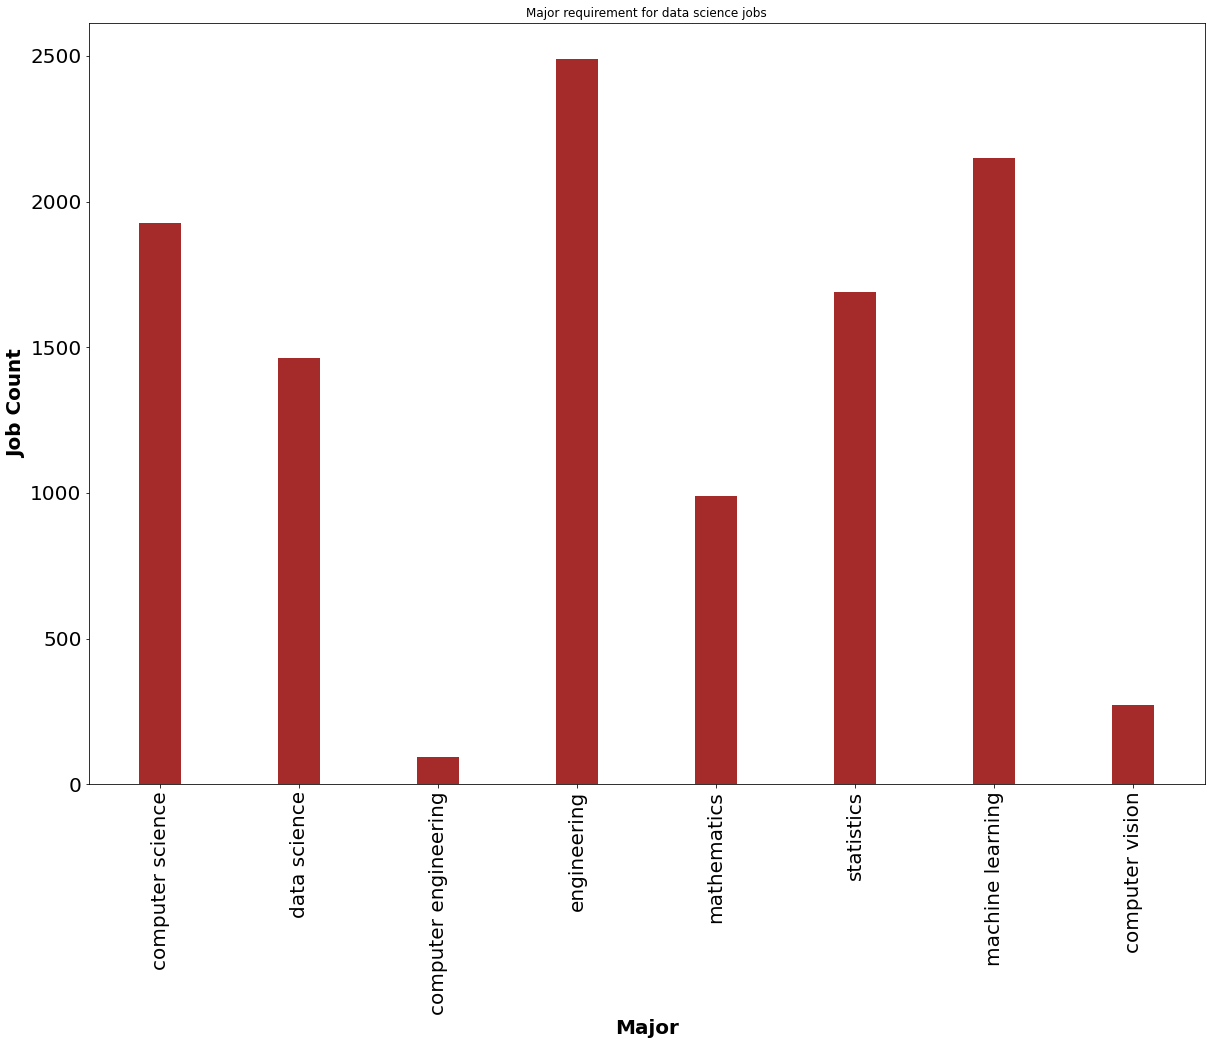

In [21]:
# Major requirement for all job types

def aggregate_major(dict):
  aggregated_dict = {}
  aggregated_dict['computer science'] = 0
  aggregated_dict['data science'] = 0
  aggregated_dict['computer engineering'] = 0
  aggregated_dict['engineering'] = 0
  aggregated_dict['mathematics'] = 0
  aggregated_dict['statistics'] = 0
  aggregated_dict['machine learning'] = 0
  aggregated_dict['computer vision'] = 0
  
  if("computer science" in dict):
    aggregated_dict['computer science']+=dict['computer science']
  if("data science" in dict):
    aggregated_dict['data science']+=dict['data science']
  if("datascience" in dict):
    aggregated_dict['data science']+=dict['datascience']
  if("computer engineering" in dict):
    aggregated_dict['computer engineering']+=dict['computer engineering']
  if("engineering" in dict):
    aggregated_dict['engineering']+=dict['engineering']
  if("mathematics" in dict):
    aggregated_dict['mathematics']+=dict['mathematics']
  if("maths" in dict):
    aggregated_dict['mathematics']+=dict['maths']
  if("applied maths" in dict):
    aggregated_dict['mathematics']+=dict['applied maths']
  if("statistics" in dict):
    aggregated_dict['statistics']+=dict['statistics']
  if("machine learning" in dict):
    aggregated_dict['machine learning']+=dict['machine learning']
  if("machine-learning" in dict):
    aggregated_dict['machine learning']+=dict['machine-learning']
  if("computer vision" in dict):
    aggregated_dict['computer vision']+=dict['computer vision']
  return aggregated_dict


major_filter = filter(combined_data_unique,'major')
major_filter = aggregate_major(major_filter)


major = list(major_filter.keys())
values = list(major_filter.values())
  
fig = plt.figure(figsize = (20, 14))
plt.xlabel('Major', fontweight ='bold',fontsize=20)
plt.ylabel('Job Count', fontweight ='bold',fontsize=20)

# creating the bar plot
plt.title("Major requirement for data science jobs")
plt.bar(major, values, color ='brown',
        width = 0.3)
plt.xticks(rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)

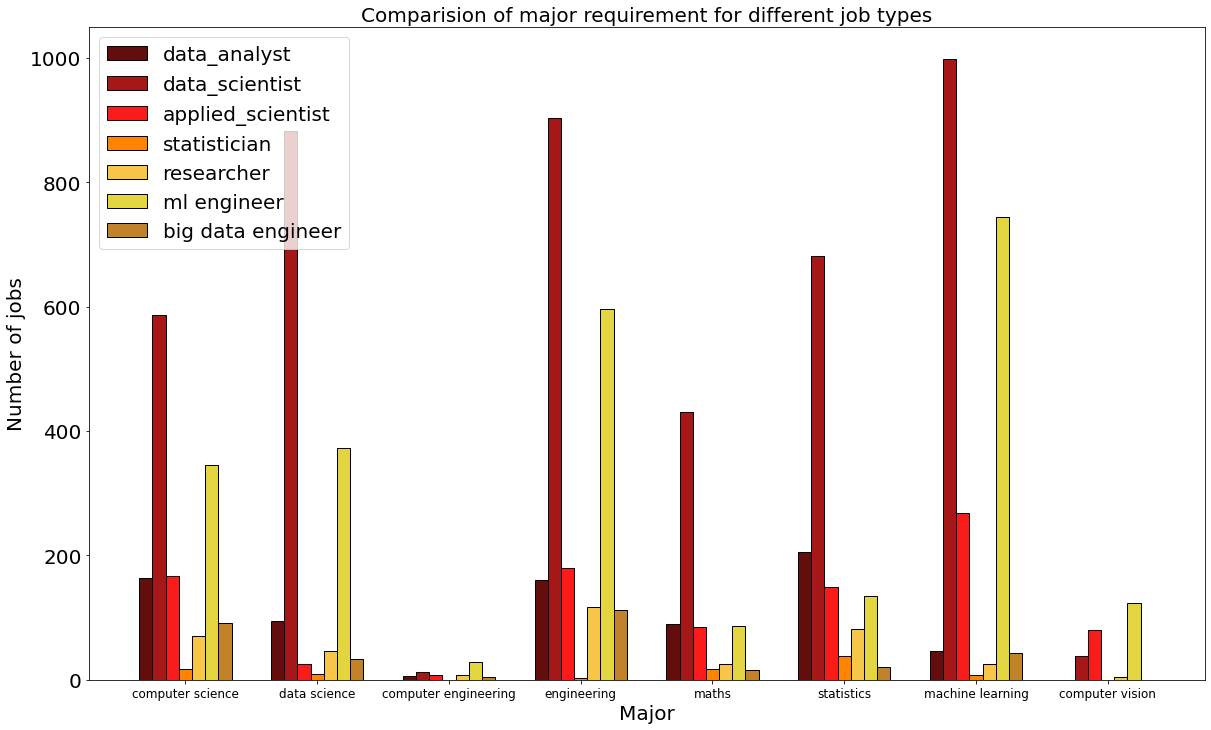

In [22]:
# Comparison of major requirement for different job types
   
data_scientist = combined_data_unique[combined_data_unique['title'].str.contains('data scientist')]
data_scientist_major_filter = filter(data_scientist,'major')
data_scientist_major_filter = aggregate_major(data_scientist_major_filter)

data_analyst = combined_data_unique[combined_data_unique['title'].str.contains('data analyst')]
data_analyst_major_filter = filter(data_analyst,'major')
data_analyst_major_filter = aggregate_major(data_analyst_major_filter)

applied_scientist = combined_data_unique[combined_data_unique['title'].str.contains('applied scientist')]
applied_scientist_major_filter = filter(applied_scientist,'major')
applied_scientist_major_filter = aggregate_major(applied_scientist_major_filter)

statistician = combined_data_unique[combined_data_unique['title'].str.contains('statistical analyst')]
statistician_major_filter = filter(statistician,'major')
statistician_major_filter = aggregate_major(statistician_major_filter)

ml = combined_data_unique[combined_data_unique['title'].str.contains('machine learning')]
ml_major_filter = filter(ml,'major')
ml_major_filter = aggregate_major(ml_major_filter)

researcher = combined_data_unique[combined_data_unique['title'].str.contains('researcher')]
researcher_major_filter = filter(researcher,'major')
researcher_major_filter = aggregate_major(researcher_major_filter)

big_data_engineer = combined_data_unique[combined_data_unique['title'].str.contains('big data')]
big_data_engineer_major_filter = filter(big_data_engineer,'major')
big_data_engineer_major_filter = aggregate_major(big_data_engineer_major_filter)

dataanalyst_values = data_analyst_major_filter.values()
data_scientist_values = data_scientist_major_filter.values()
applied_scientist_values = applied_scientist_major_filter.values()
statistician_values = statistician_major_filter.values()
researcher_values = researcher_major_filter.values()
ml_filter_values = ml_major_filter.values()
big_data_engineer_filter_values = big_data_engineer_major_filter.values()
n=len(ml_major_filter)
r = np.arange(n)
width = 0.1
  
fig = plt.figure(figsize = (20, 12))
plt.bar(r, dataanalyst_values, color = '#630d0d',
        width = width, edgecolor = 'black',
        label='data_analyst')
plt.bar(r + width, data_scientist_values, color = '#a61717',
        width = width, edgecolor = 'black',
        label='data_scientist')
plt.bar(r + 2*width, applied_scientist_values, color = '#fa1b1b',
        width = width, edgecolor = 'black',
        label='applied_scientist')
plt.bar(r + 3*width, statistician_values, color = '#ff8400',
        width = width, edgecolor = 'black',
        label='statistician')
plt.bar(r + 4*width, researcher_values, color = '#f7c648',
        width = width, edgecolor = 'black',
        label='researcher')
plt.bar(r + 5*width, ml_filter_values, color = '#e3d540',
        width = width, edgecolor = 'black',
        label='ml engineer')
plt.bar(r + 6*width, big_data_engineer_filter_values, color = '#c28229',
        width = width, edgecolor = 'black',
        label='big data engineer')
  
plt.xlabel("Major",fontsize=20)
plt.ylabel("Number of jobs",fontsize=20)
plt.title("Comparision of major requirement for different job types",fontsize=20)
  
# plt.grid(linestyle='--')
plt.xticks(r + 3*width,['computer science','data science','computer engineering','engineering','maths','statistics','machine learning','computer vision'],fontsize=12)
plt.legend(loc=2, prop={'size': 20})
plt.yticks(fontsize=20)
plt.show()

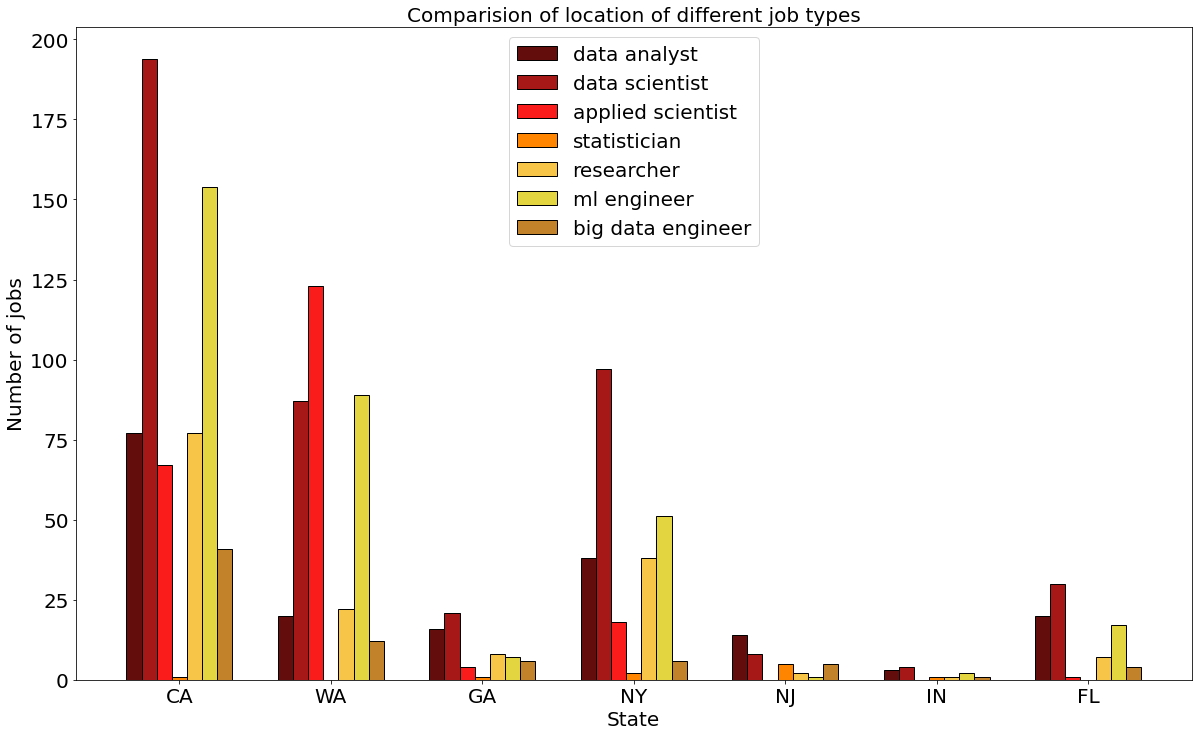

In [23]:
# Top locations for jobs based on count

def aggregate_loc(dict):
  aggregated_dict = {}
  aggregated_dict['CA'] = 0
  aggregated_dict['WA'] = 0
  aggregated_dict['GA'] = 0
  aggregated_dict['NY'] = 0
  aggregated_dict['NJ'] = 0
  aggregated_dict['IN'] = 0
  aggregated_dict['FL'] = 0
  if("ca" in dict):
    aggregated_dict['CA']+=dict['ca']
  if("wa" in dict):
    aggregated_dict['WA']+=dict['wa']
  if("ga" in dict):
    aggregated_dict['GA']+=dict['ga']
  if("ny" in dict):
    aggregated_dict['NY']+=dict['ny']
  if("nj" in dict):
    aggregated_dict['NJ']+=dict['nj']
  if("in" in dict):
    aggregated_dict['IN']+=dict['in']
  if("fl" in dict):
    aggregated_dict['FL']+=dict['fl']
  return aggregated_dict

data_scientist = combined_data_unique[combined_data_unique['title'].str.contains('data scientist')]
data_scientist_location_cleaned_filter = filter(data_scientist,'location_cleaned')
data_scientist_location_cleaned_filter = aggregate_loc(data_scientist_location_cleaned_filter)

data_analyst = combined_data_unique[combined_data_unique['title'].str.contains('data analyst')]
data_analyst_location_cleaned_filter = filter(data_analyst,'location_cleaned')
data_analyst_location_cleaned_filter = aggregate_loc(data_analyst_location_cleaned_filter)

applied_scientist = combined_data_unique[combined_data_unique['title'].str.contains('applied scientist')]
applied_scientist_location_cleaned_filter = filter(applied_scientist,'location_cleaned')
applied_scientist_location_cleaned_filter = aggregate_loc(applied_scientist_location_cleaned_filter)

statistician = combined_data_unique[combined_data_unique['title'].str.contains('statistical analyst')]
statistician_location_cleaned_filter = filter(statistician,'location_cleaned')
statistician_location_cleaned_filter = aggregate_loc(statistician_location_cleaned_filter)

ml = combined_data_unique[combined_data_unique['title'].str.contains('machine learning')]
ml_location_cleaned_filter = filter(ml,'location_cleaned')
ml_location_cleaned_filter = aggregate_loc(ml_location_cleaned_filter)

researcher = combined_data_unique[combined_data_unique['title'].str.contains('researcher')]
researcher_location_cleaned_filter = filter(researcher,'location_cleaned')
researcher_location_cleaned_filter = aggregate_loc(researcher_location_cleaned_filter)

big_data_engineer = combined_data_unique[combined_data_unique['title'].str.contains('big data')]
big_data_engineer_location_cleaned_filter = filter(big_data_engineer,'location_cleaned')
big_data_engineer_location_cleaned_filter = aggregate_loc(big_data_engineer_location_cleaned_filter)

import numpy as np
import matplotlib.pyplot as plt
   
dataanalyst_values = data_analyst_location_cleaned_filter.values()
data_scientist_values = data_scientist_location_cleaned_filter.values()
applied_scientist_values = applied_scientist_location_cleaned_filter.values()
statistician_values = statistician_location_cleaned_filter.values()
researcher_values = researcher_location_cleaned_filter.values()
ml_filter_values = ml_location_cleaned_filter.values()
big_data_engineer_filter_values = big_data_engineer_location_cleaned_filter.values()
n=len(ml_location_cleaned_filter)
r = np.arange(n)
width = 0.1
  
fig = plt.figure(figsize = (20, 12))
plt.bar(r, dataanalyst_values, color = '#630d0d',
        width = width, edgecolor = 'black',
        label='data analyst')
plt.bar(r + width, data_scientist_values, color = '#a61717',
        width = width, edgecolor = 'black',
        label='data scientist')
plt.bar(r + 2*width, applied_scientist_values, color = '#fa1b1b',
        width = width, edgecolor = 'black',
        label='applied scientist')
plt.bar(r + 3*width, statistician_values, color = '#ff8400',
        width = width, edgecolor = 'black',
        label='statistician')
plt.bar(r + 4*width, researcher_values, color = '#f7c648',
        width = width, edgecolor = 'black',
        label='researcher')
plt.bar(r + 5*width, ml_filter_values, color = '#e3d540',
        width = width, edgecolor = 'black',
        label='ml engineer')
plt.bar(r + 6*width, big_data_engineer_filter_values, color = '#c28229',
        width = width, edgecolor = 'black',
        label='big data engineer') 

plt.xlabel("State",fontsize=20)
plt.ylabel("Number of jobs",fontsize=20)
plt.title("Comparision of location of different job types",fontsize=20)
  
# plt.grid(linestyle='--')
plt.xticks(r + 3*width,['CA','WA','GA','NY','NJ','IN','FL'],fontsize=20)
plt.legend(loc=9, prop={'size': 20})
plt.yticks(fontsize=20)
plt.show()

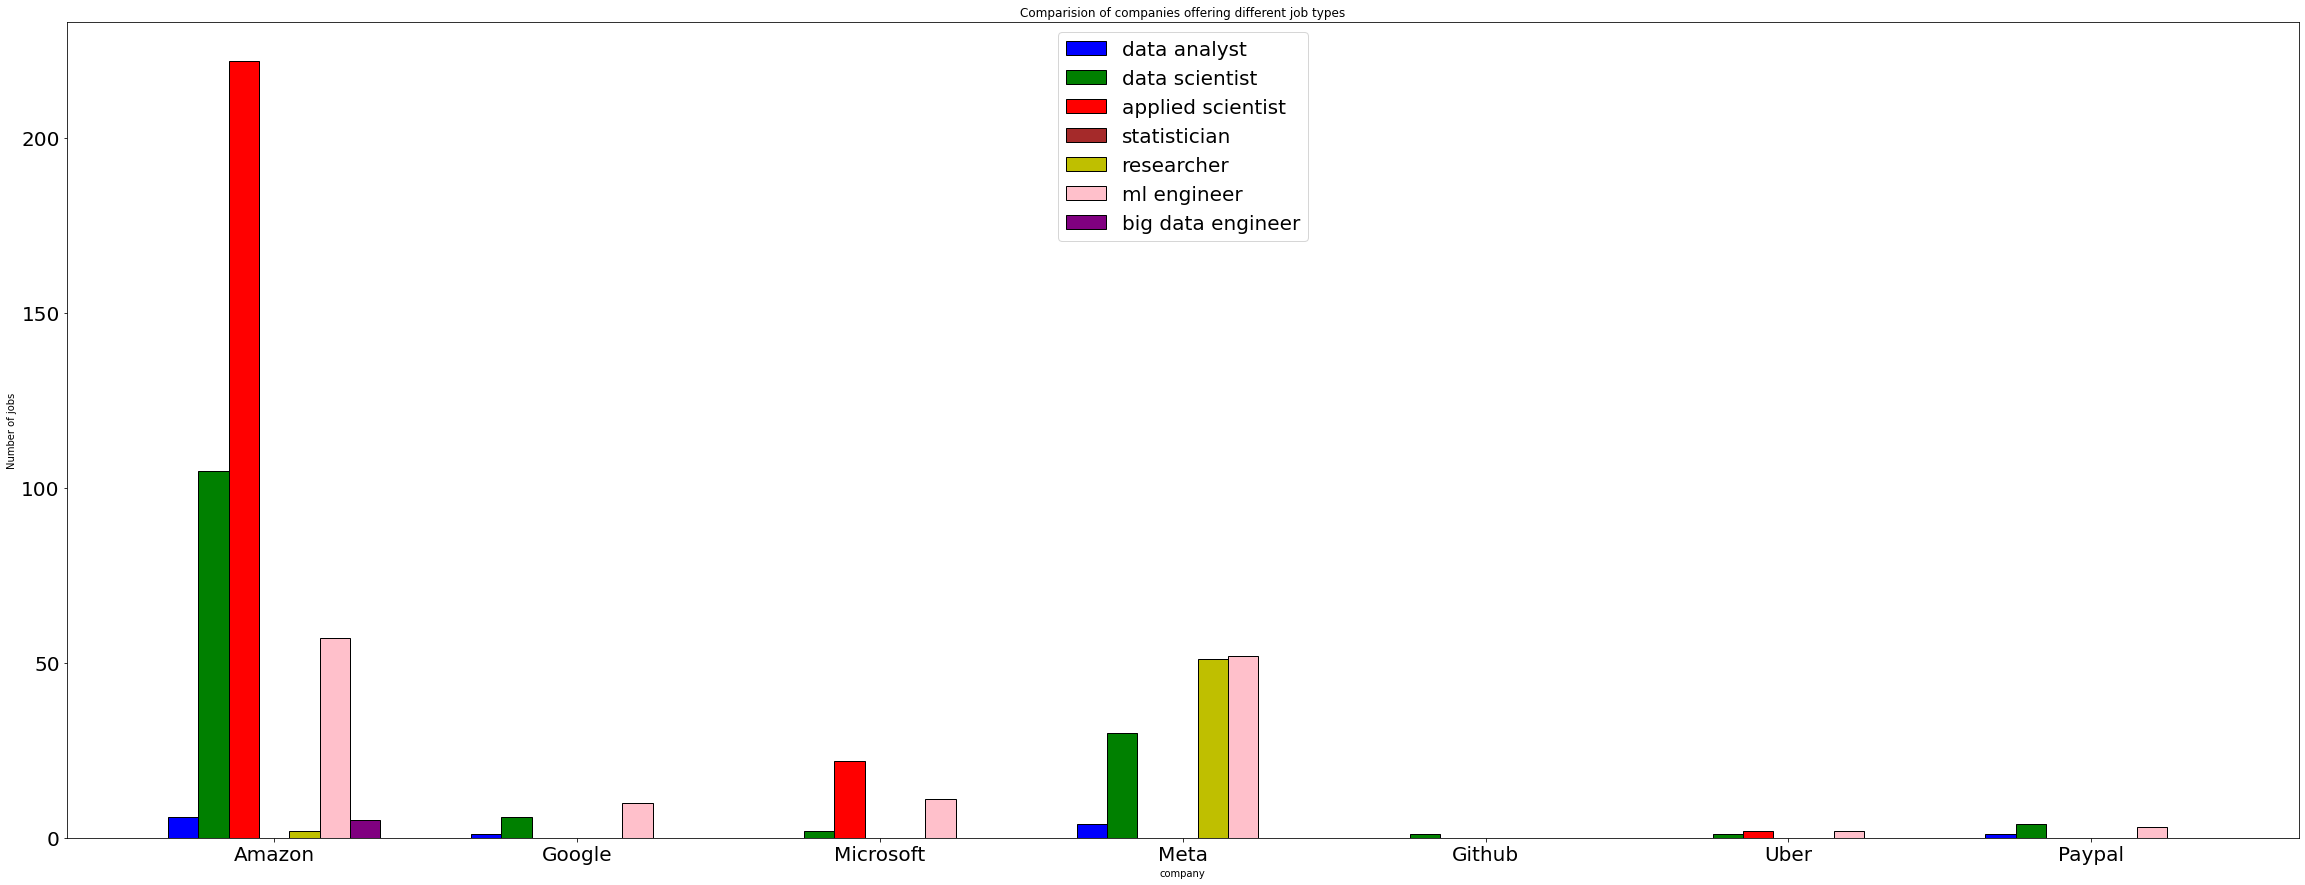

In [24]:
# Comparison of different job types by listing count for major companies

def aggregate_company(dict):
  aggregated_dict = {}
  aggregated_dict['amazon'] = 0
  aggregated_dict['google'] = 0
  aggregated_dict['microsoft'] = 0
  aggregated_dict['meta'] = 0
  aggregated_dict['github'] = 0
  aggregated_dict['uber'] = 0
  aggregated_dict['paypal'] = 0
  if("amazon" in dict):
    aggregated_dict['amazon']+=dict['amazon']
  if("google" in dict):
    aggregated_dict['google']+=dict['google']
  if("microsoft" in dict):
    aggregated_dict['microsoft']+=dict['microsoft']
  if("meta" in dict):
    aggregated_dict['meta']+=dict['meta']
  if("github" in dict):
    aggregated_dict['github']+=dict['uber']
  if("uber" in dict):
    aggregated_dict['uber']+=dict['uber']
  if("paypal" in dict):
    aggregated_dict['paypal']+=dict['paypal']
  return aggregated_dict

data_scientist = combined_data_unique[combined_data_unique['title'].str.contains('data scientist')]
data_scientist_company_filter = filter_company(data_scientist,'comapany')
data_scientist_company_filter = aggregate_company(data_scientist_company_filter)

data_analyst = combined_data_unique[combined_data_unique['title'].str.contains('data analyst')]
data_analyst_company_filter = filter_company(data_analyst,'comapany')
data_analyst_company_filter = aggregate_company(data_analyst_company_filter)

applied_scientist = combined_data_unique[combined_data_unique['title'].str.contains('applied scientist')]
applied_scientist_company_filter = filter_company(applied_scientist,'comapany')
applied_scientist_company_filter = aggregate_company(applied_scientist_company_filter)

statistician = combined_data_unique[combined_data_unique['title'].str.contains('statistical analyst')]
statistician_company_filter = filter_company(statistician,'comapany')
statistician_company_filter = aggregate_company(statistician_company_filter)

ml = combined_data_unique[combined_data_unique['title'].str.contains('machine learning')]
ml_company_filter = filter_company(ml,'comapany')
ml_company_filter = aggregate_company(ml_company_filter)


researcher = combined_data_unique[combined_data_unique['title'].str.contains('researcher')]
researcher_company_filter = filter_company(researcher,'comapany')
researcher_company_filter = aggregate_company(researcher_company_filter)

big_data_engineer = combined_data_unique[combined_data_unique['title'].str.contains('big data')]
big_data_engineer_company_filter = filter_company(big_data_engineer,'comapany')
big_data_engineer_company_filter = aggregate_company(big_data_engineer_company_filter)

dataanalyst_values = data_analyst_company_filter.values()
data_scientist_values = data_scientist_company_filter.values()
applied_scientist_values = applied_scientist_company_filter.values()
statistician_values = statistician_company_filter.values()
researcher_values = researcher_company_filter.values()
ml_filter_values = ml_company_filter.values()
big_data_engineer_filter_values = big_data_engineer_company_filter.values()

n=len(ml_company_filter)
r = np.arange(n)
width = 0.1
  
fig = plt.figure(figsize = (40, 15))
plt.bar(r, dataanalyst_values, color = 'b',
        width = width, edgecolor = 'black',
        label='data analyst')
plt.bar(r + width, data_scientist_values, color = 'g',
        width = width, edgecolor = 'black',
        label='data scientist')
plt.bar(r + 2*width, applied_scientist_values, color = 'r',
        width = width, edgecolor = 'black',
        label='applied scientist')
plt.bar(r + 3*width, statistician_values, color = 'brown',
        width = width, edgecolor = 'black',
        label='statistician')
plt.bar(r + 4*width, researcher_values, color = 'y',
        width = width, edgecolor = 'black',
        label='researcher')
plt.bar(r + 5*width, ml_filter_values, color = 'pink',
        width = width, edgecolor = 'black',
        label='ml engineer')
plt.bar(r + 6*width, big_data_engineer_filter_values, color = 'purple',
        width = width, edgecolor = 'black',
        label='big data engineer')
  
plt.xlabel("company")
plt.ylabel("Number of jobs")
plt.title("Comparision of companies offering different job types")
  
# plt.grid(linestyle='--')
plt.xticks(r + 3*width,['Amazon','Google','Microsoft','Meta','Github','Uber','Paypal'],fontsize=20)
plt.legend(loc=9, prop={'size': 20})
plt.yticks(fontsize=20)
plt.show()

# Data preprocessing needed for our problems and solutions

In [25]:
# Features for training ML models for classifying jobs
data = combined_data_unique[['education','major','comapany','skill','concept','title']]

In [26]:
# Remove inconsistency from titles by grouping into 7 job types
conditions = [
    (data['title'].str.contains('data scientist')),
    (data['title'].str.contains('data analyst')),
    (data['title'].str.contains('applied scientist')),    
    (data['title'].str.contains('research')),
    (data['title'].str.contains('statistical')),
    (data['title'].str.contains('ml')),
    (data['title'].str.contains('machine learning')),
    (data['title'].str.contains('big data')),
]
choices = ['data scientist', 'data analyst', 'applied scientist','researcher','statistical analyst','ml engineer','ml engineer','big data engineer']
data['title_cleaned'] = np.select(conditions, choices, default='data scientist')

In [27]:
# Split class (title_cleaned) and features (education,major,skill,concept)

data.head()
data=data.dropna()
data1 = data[['education','major','comapany','skill','concept']]
label = data[['title_cleaned']]
data1.head()

,education,major,comapany,skill,concept
0,[No requirement specified],[No requirement specified],the home depot,[No requirement specified],[No requirement specified]
0,"[bachelor, master]",[statistics],university of pennsylvania,[sas],"[statistics, research, manipulation]"
0,[No requirement specified],[No requirement specified],cnn,[No requirement specified],[research]
0,[No requirement specified],[No requirement specified],webmasters4seo,[No requirement specified],[business intelligence]
0,[bachelor],[engineering],comcast,"[python, unix, hadoop, spark, sql, scala, aws,...","[cloud computing, research]"


In [28]:
# One hot encode skills. education, major and domain/concepts

data = pd.concat([
        data.drop("skill", 1),
        data.skill.apply(lambda x: pd.Series(1, x)).fillna(0),
    ], axis=1)

data = pd.concat([
        data.drop("concept", 1),
        data.concept.apply(lambda x: pd.Series(1, x)).fillna(0),
    ], axis=1)

data = pd.concat([
        data.drop("major", 1),
        data.major.apply(lambda x: pd.Series(1, x)).fillna(0),
    ], axis=1)

data = pd.concat([
        data.drop("education", 1),
        data.education.apply(lambda x: pd.Series(1, x)).fillna(0),
    ], axis=1)
data = pd.concat([
        data.drop("title", 1),
    ], axis=1)

In [29]:
# Split class (title_cleaned) and features (education,major,skill,concept)

data1 = data.loc[:, data.columns != 'title_cleaned']
label = data[['title_cleaned']]

# Encode the class/label and company name
le = preprocessing.LabelEncoder()
for i in range(data1.shape[1]):
    data1.iloc[:,i] = le.fit_transform(data1.iloc[:,i])
label.iloc[:,0]= le.fit_transform(label.iloc[:,0])

Text(0.5, 1.0, 'Correlation')

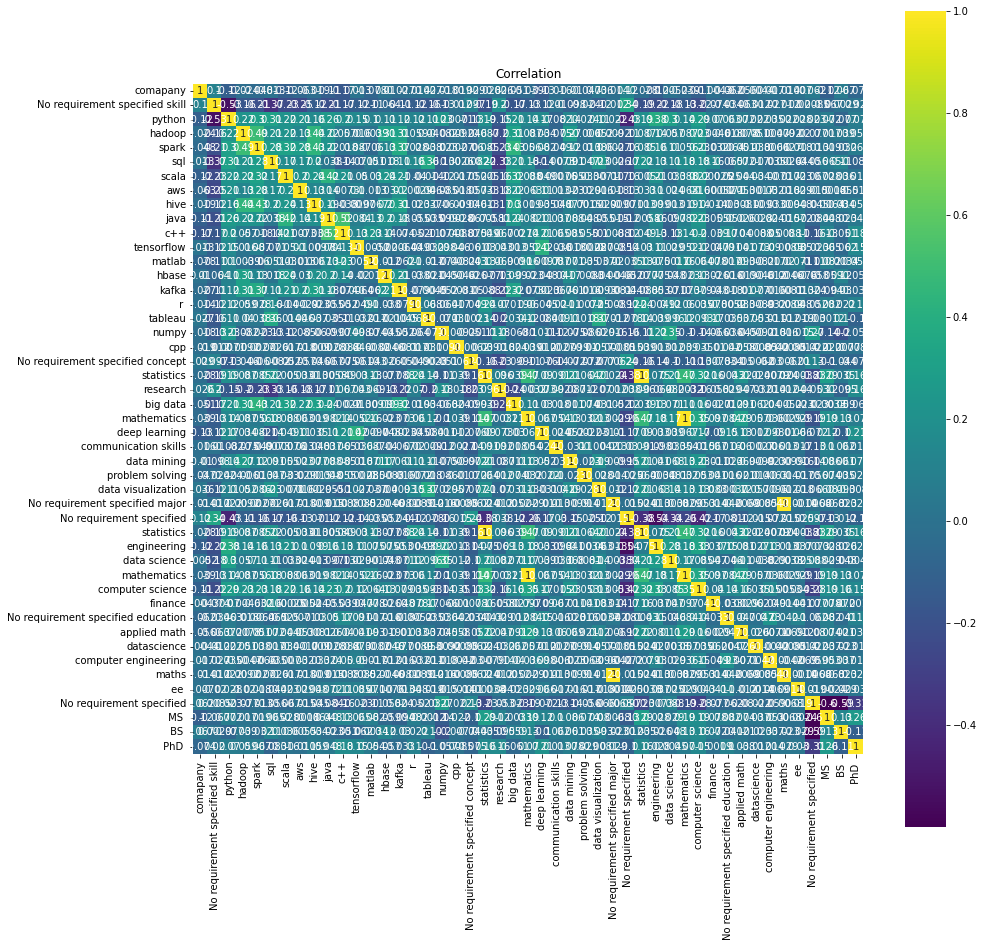

In [30]:
# Drop duplicate columns 
# Aggregate inconsistently named but same columns into one column

data1[" MS "] = data1[" ms "] | data1["masters"] | data1["m.s"] | data1["master"]
data1[" BS "] = data1[" bs "] | data1["bachelors"] | data1["b.s"] | data1["bachelor"]
data1[" PhD "] = data1[" phd "] | data1["ph.d"]
data1 = data1.drop(" ms ",1)
data1 = data1.drop("m.s",1)
data1 = data1.drop(" bs ",1)
data1 = data1.drop("b.s",1)
data1 = data1.drop("masters",1)
data1 = data1.drop("master",1)
data1 = data1.drop("bachelor",1)
data1 = data1.drop("bachelors",1)
data1 = data1.drop("ph.d",1)
data1 = data1.drop(" phd ",1)
data1 = data1.drop("postgraduate",1)
data1 = data1.drop("sas",1)
data1 = data1.drop("unix",1)
data1 = data1.drop("spreadsheets",1)
data1 = data1.drop("powerpoint",1)
data1 = data1.drop("mysql",1)
data1 = data1.drop("azure",1)
data1 = data1.drop("perl",1)
data1 = data1.drop("html",1)
data1 = data1.drop("css",1)
data1 = data1.drop("pig",1)
data1 = data1.drop("keras",1)
data1 = data1.drop("pyspark",1)
data1 = data1.drop("manipulation",1)
data1 = data1.drop("cloud computing",1)
data1 = data1.drop("artificial intelligence",1)
data1 = data1.drop("preprocessing",1)
data1 = data1.drop("feature engineering",1)
data1 = data1.drop("probability",1)
data1 = data1.drop("distributed systems",1)
data1 = data1.drop(" ai ",1)
data1 = data1.drop("computer vision",1)
data1 = data1.drop("etl",1)
data1 = data1.drop(" bi ",1)
data1 = data1.drop("machine-learning",1)
data1 = data1.drop("neural network",1)
data1 = data1.drop("critical thinking",1)
data1 = data1.drop("data warehousing",1)
data1 = data1.drop("project management",1)
data1 = data1.drop("excel ",1)
data1 = data1.drop("linux",1)
data1 = data1.drop("postgres",1)
data1 = data1.drop(" c ",1)
data1 = data1.drop("nosql",1)
data1 = data1.drop("mongodb",1)
data1 = data1.drop("javascript",1)
data1 = data1.drop("cassandra",1)
data1 = data1.drop("seaborn",1)
data1 = data1.drop("business intelligence",1)
data1.columns.values[1] ='No requirement specified skill'
data1.columns.values[22] = 'No requirement specified concept'
data1.columns.values[34] = 'No requirement specified major'
data1.columns.values[43] = 'No requirement specified education'
data1 = data1.drop('pytorch',1)
data1 = data1.drop('scikit-learn',1)
data1 = data1.drop('pandas',1)
data1 = data1.drop('machine learning',1)
data1 = data1.drop(' ml ',1)

# Check correlation in data
data1.corr()
correlation = data1.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation')

In [31]:
# Use SMOTE (Synthetic Minority Oversampling technique to remove bias in data)
oversample = SMOTE()
X_resample,y_resample=SMOTE().fit_resample(np.array(data1),label.squeeze())

y_resample=pd.DataFrame(y_resample)
X_resample=pd.DataFrame(X_resample)

In [32]:
#PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_resample=scaler.fit_transform(X_resample)

# Get instance of PCA
pca = PCA() 

# Transfer the arranged data to new feature space using eigen vectors calculated by PCA
dataTransformed = pca.fit_transform(X_resample)
print("DataTransformed")
print(dataTransformed)
print("Eigenvalues")

# Variance of data with each principal component
print(pca.explained_variance_)
print("Eigenvectors")
print(pca.components_)

# Sum of variance captured
print(pca.explained_variance_ratio_.sum())

DataTransformed
[[-4.46576331e+00  1.01548059e+00  1.63995875e-01 ... -9.21267969e-16
   3.29400740e-17  8.52936507e-17]
 [-1.40665103e+00 -1.88002549e+00  8.87292763e-01 ... -4.27987423e-14
   7.89256179e-15 -2.61055916e-15]
 [-3.63710916e+00  2.45883991e-02 -6.22353834e-01 ...  5.24416959e-14
  -9.93651271e-15  2.92238806e-15]
 ...
 [-1.08578923e+00 -1.62614672e+00  1.37603766e+00 ...  2.40866614e-17
  -2.16701805e-19  9.58308192e-18]
 [-1.15829262e+00 -1.19746999e+00  8.70097451e-01 ...  1.85096318e-16
   1.17278661e-16  1.38405962e-17]
 [-7.32321096e-01 -1.56770327e+00  4.93063385e-01 ...  3.84265618e-16
   1.26435469e-16  1.18795853e-17]]
Eigenvalues
[4.87153150e+00 3.74636729e+00 2.71248826e+00 2.01898407e+00
 1.94122760e+00 1.70364123e+00 1.58336713e+00 1.49681621e+00
 1.45106993e+00 1.37985248e+00 1.23875489e+00 1.16207000e+00
 1.11444749e+00 1.06360944e+00 1.04243212e+00 1.01271940e+00
 9.72779920e-01 9.53259946e-01 9.13439266e-01 8.99796236e-01
 8.56840435e-01 8.23488729e-01 

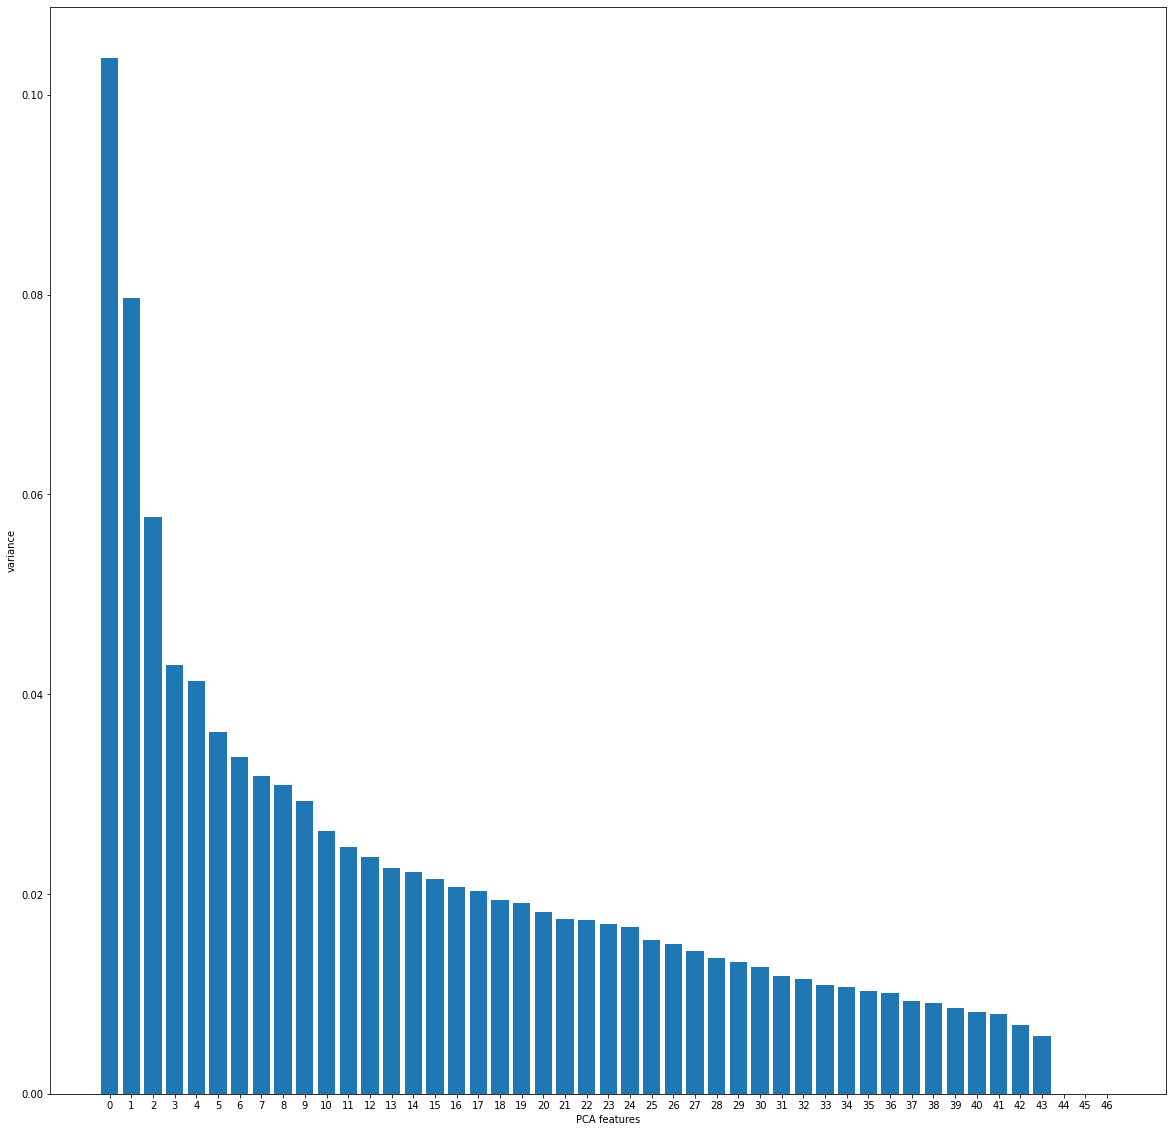

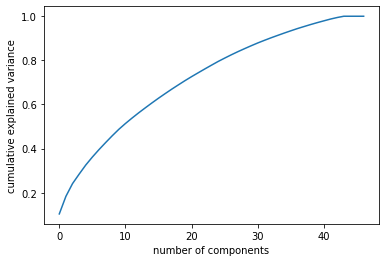

In [33]:
features = range(pca.n_components_)
plt.figure(figsize=(20,20))
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.show()


pca_all = PCA().fit(X_resample)
plt.plot(np.cumsum(pca_all.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [34]:
# Most of the variance is captured in 40 components

In [35]:
# One hot Encode class values as integers for multiclass Artificial neural network

encoder = preprocessing.LabelEncoder()
encoder.fit(y_resample)
encoded_Y = encoder.transform(y_resample)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



# Classify job description into job type

In [36]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.3,random_state=109) # 70% training and 30% test

In [37]:
# Split dataset into training set and test set for multiclass ANN with one-hot-encoded labels
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resample, dummy_y, test_size=0.3,random_state=109) # 70% training and 30% test

In [38]:
# Reduce dimention with PCA
pca = PCA(n_components=40)
pca.fit(X_train)
X_train_fit = pca.transform(X_train)
X_test_fit = pca.transform(X_test)

In [39]:
# Reduce dimention with PCA
_pca = PCA(n_components=40)
pca.fit(X_train1)
X_train1 = pca.transform(X_train1)
X_test1 = pca.transform(X_test1)

In [40]:
!sudo pip install imbalanced-learn

In [41]:
print(imblearn.__version__)
# Class distribution to show balanced data
counter = Counter(y_resample['title_cleaned'].values)
print(counter)

0.8.1
Counter({3: 2288, 6: 2288, 5: 2288, 2: 2288, 1: 2288, 4: 2288, 0: 2288})


In [42]:
# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training data 
knn.fit(X_train, np.ravel(y_train))

# Predict the job type for test dataset
y_pred = knn.predict(X_test)

In [43]:
# Print accuracy and classfication report
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

Accuracy: 0.8443288241415192


,precision,recall,f1-score,support
0,0.890095,0.946609,0.917483,693.000000
1,0.895916,0.978417,0.935351,695.000000
2,0.712418,0.799120,0.753283,682.000000
3,0.827853,0.614060,0.705107,697.000000
4,0.851190,0.835036,0.843036,685.000000
5,0.870066,0.781388,0.823346,677.000000
6,0.866131,0.957101,0.909346,676.000000
accuracy,0.844329,0.844329,0.844329,0.844329
macro avg,0.844810,0.844533,0.840993,4805.000000
weighted avg,0.844950,0.844329,0.840934,4805.000000


In [44]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=10)

# Train the model using the training data 
knn.fit(X_train, np.ravel(y_train))

# Predict the job type for test dataset
y_pred = knn.predict(X_test)

In [45]:
# Print accuracy and classfication report
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

Accuracy: 0.8116545265348595


,precision,recall,f1-score,support
0,0.859580,0.945166,0.900344,693.000000
1,0.850192,0.955396,0.899729,695.000000
2,0.676037,0.740469,0.706788,682.000000
3,0.855530,0.543759,0.664912,697.000000
4,0.836957,0.786861,0.811136,685.000000
5,0.819063,0.748892,0.782407,677.000000
6,0.804697,0.963018,0.876768,676.000000
accuracy,0.811655,0.811655,0.811655,0.811655
macro avg,0.814580,0.811937,0.806012,4805.000000
weighted avg,0.814928,0.811655,0.805980,4805.000000


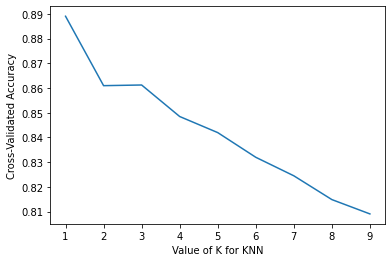

In [46]:
# Check best K value
k_range = range(1, 10)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, np.ravel(y_train), cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [47]:
# import cross val
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors = 1)
scores = cross_val_score(knn, X_train, np.ravel(y_train), cv=5, scoring='accuracy')
print(scores.mean())
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

0.8890374772858607


,precision,recall,f1-score,support
0,0.859580,0.945166,0.900344,693.000000
1,0.850192,0.955396,0.899729,695.000000
2,0.676037,0.740469,0.706788,682.000000
3,0.855530,0.543759,0.664912,697.000000
4,0.836957,0.786861,0.811136,685.000000
5,0.819063,0.748892,0.782407,677.000000
6,0.804697,0.963018,0.876768,676.000000
accuracy,0.811655,0.811655,0.811655,0.811655
macro avg,0.814580,0.811937,0.806012,4805.000000
weighted avg,0.814928,0.811655,0.805980,4805.000000


In [48]:
# Decision Tree Classifer
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the job type for test dataset
y_pred = clf.predict(X_test)

# Print accuracy and classfication report
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

Accuracy: 0.8896982310093653


,precision,recall,f1-score,support
0,0.962804,0.971140,0.966954,693.000000
1,0.939944,0.968345,0.953933,695.000000
2,0.802260,0.832845,0.817266,682.000000
3,0.818033,0.715925,0.763581,697.000000
4,0.886269,0.932847,0.908962,685.000000
5,0.879699,0.864106,0.871833,677.000000
6,0.930029,0.943787,0.936858,676.000000
accuracy,0.889698,0.889698,0.889698,0.889698
macro avg,0.888434,0.889856,0.888484,4805.000000
weighted avg,0.888480,0.889698,0.888420,4805.000000


In [49]:
# Decision Tree Classifer
clf = DecisionTreeClassifier(criterion="entropy",splitter='best')
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the job type for test dataset
y_pred = clf.predict(X_test)

# Print accuracy and classfication report
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

Accuracy: 0.891363163371488


,precision,recall,f1-score,support
0,0.956215,0.976912,0.966453,693.000000
1,0.928865,0.976978,0.952314,695.000000
2,0.813486,0.831378,0.822335,682.000000
3,0.821138,0.724534,0.769817,697.000000
4,0.910534,0.921168,0.915820,685.000000
5,0.863501,0.859675,0.861584,677.000000
6,0.934498,0.949704,0.942040,676.000000
accuracy,0.891363,0.891363,0.891363,0.891363
macro avg,0.889748,0.891478,0.890052,4805.000000
weighted avg,0.889776,0.891363,0.890001,4805.000000


In [50]:
# Decision Tree Classifer
clf = DecisionTreeClassifier(criterion="entropy",splitter='random')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the job type for test dataset
y_pred = clf.predict(X_test)

# Print accuracy and classfication report
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

Accuracy: 0.8836628511966701


,precision,recall,f1-score,support
0,0.935083,0.976912,0.955540,693.000000
1,0.944675,0.982734,0.963329,695.000000
2,0.810541,0.834311,0.822254,682.000000
3,0.813356,0.681492,0.741608,697.000000
4,0.876771,0.903650,0.890007,685.000000
5,0.855244,0.855244,0.855244,677.000000
6,0.934688,0.952663,0.943590,676.000000
accuracy,0.883663,0.883663,0.883663,0.883663
macro avg,0.881480,0.883858,0.881653,4805.000000
weighted avg,0.881519,0.883663,0.881561,4805.000000


In [51]:
# Adaboost classifier
clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(),n_estimators=5, 
                         learning_rate = 0.5, random_state=0).fit(X_train, numpy.ravel(y_train))

# Predict the job type for test dataset
y_pred1 = clf.predict(X_test)
output_dict=True 

# Print accuracy and classfication report
pd.DataFrame(classification_report(y_test, y_pred1, output_dict=True)).T

,precision,recall,f1-score,support
0,0.974026,0.974026,0.974026,693.000000
1,0.943978,0.969784,0.956707,695.000000
2,0.808123,0.846041,0.826648,682.000000
3,0.834138,0.743185,0.786039,697.000000
4,0.908322,0.940146,0.923960,685.000000
5,0.883756,0.875923,0.879822,677.000000
6,0.941435,0.951183,0.946284,676.000000
accuracy,0.899896,0.899896,0.899896,0.899896
macro avg,0.899111,0.900041,0.899069,4805.000000
weighted avg,0.899170,0.899896,0.899021,4805.000000


In [52]:
# Bagging classifier
clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(),n_estimators=5, random_state=0).fit(X_train, y_train)

# Predict the job type for test dataset
y_pred1 = clf.predict(X_test)
output_dict=True 

# Print accuracy and classfication report
pd.DataFrame(classification_report(y_test, y_pred1, output_dict=True)).T

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



,precision,recall,f1-score,support
0,0.961864,0.982684,0.972163,693.000000
1,0.929558,0.968345,0.948555,695.000000
2,0.799157,0.834311,0.816356,682.000000
3,0.842715,0.730273,0.782475,697.000000
4,0.911017,0.941606,0.926059,685.000000
5,0.884558,0.871492,0.877976,677.000000
6,0.932551,0.940828,0.936672,676.000000
accuracy,0.895525,0.895525,0.895525,0.895525
macro avg,0.894489,0.895648,0.894322,4805.000000
weighted avg,0.894549,0.895525,0.894282,4805.000000


In [53]:
# Artificial neural network

# Define model
model = Sequential()
model.add(Dense(250, input_dim=40, activation='relu'))
model.add(Dense(128, activation='relu'))

# seven classes
model.add(Dense(7, activation='sigmoid'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Standardize data
Xdata_standardized = StandardScaler().fit_transform(X_train1)
Xtestdata_standardized = StandardScaler().fit_transform(X_test1)

# Normalize data
X_train_norm = preprocessing.normalize(X_train1,norm='l2')
X_test_norm = preprocessing.normalize(X_test1,norm='l2')

# Train the model
model.fit(Xdata_standardized, y_train1, epochs=10, batch_size=10)

X_train1 = np.array(X_train1)
X_test1=np.array(X_test1)
y_train1=np.array(y_train1)
y_test1=np.array(y_test1)

# Evaluate the model on test data (one-hot encoded labels)
_, accuracy = model.evaluate(Xtestdata_standardized, y_test1)
print('Accuracy: %.2f' % (accuracy*100))

# Make probability predictions with the model
predictions = model.predict(X_test1)

Epoch 1/10
1122/1122 [==============================] - 3s 2ms/step - loss: 0.6808 - accuracy: 0.7685
Epoch 2/10
1122/1122 [==============================] - 2s 2ms/step - loss: 0.4754 - accuracy: 0.8364
Epoch 3/10
1122/1122 [==============================] - 2s 2ms/step - loss: 0.4080 - accuracy: 0.8582
Epoch 4/10
1122/1122 [==============================] - 2s 2ms/step - loss: 0.3663 - accuracy: 0.8713
Epoch 5/10
1122/1122 [==============================] - 2s 2ms/step - loss: 0.3206 - accuracy: 0.8837
Epoch 6/10
1122/1122 [==============================] - 2s 2ms/step - loss: 0.2946 - accuracy: 0.8947
Epoch 7/10
1122/1122 [==============================] - 3s 2ms/step - loss: 0.2736 - accuracy: 0.9021
Epoch 8/10
1122/1122 [==============================] - 3s 2ms/step - loss: 0.2514 - accuracy: 0.9080
Epoch 9/10
1122/1122 [==============================] - 2s 2ms/step - loss: 0.2342 - accuracy: 0.9152
Epoch 10/10
151/151 [==============================] - 0s 2ms/step - loss: 0.5280 

# Perform job recommendations based on job description similarities

In [54]:
'''
Following lines of codes perform job recommendations based on job description similarities
'''
nltk.download('stopwords')

nltk.download('punkt')
# Removing html tags
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

description = list(combined_data_unique['description'])

descriptList = []
for sentences in description:
    descriptList.append(strip_html_tags(sentences))

# Data preprocessing
stop_words = nltk.corpus.stopwords.words('english')
def normalize_document(doc):

    # lower case and remove special characters\whitespaces
    # doc = re.sub(r'[^a-zA-Z0-9\s]', ", doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc
normalize_corpus = np.vectorize(normalize_document)
norm_corpus = normalize_corpus(descriptList)
len(norm_corpus)


# vectorizing preprocessed job descriptions and converting it into numeric vectors.
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range=(1, 2), min_df=2)
tfidf_matrix = tf.fit_transform(norm_corpus)
tfidf_matrix.shape


# Computing Cosine similarity on the tfidf_matrix

from sklearn.metrics.pairwise import cosine_similarity
doc_sim = cosine_similarity(tfidf_matrix)
doc_sim_df = pd.DataFrame(doc_sim)
doc_sim_df.head()
title_list = combined_data_unique['title'].values


def job_recommender(job_title, jobs=title_list, doc_sims=doc_sim_df):
    
    # find job title id
    title_idx = np.where(jobs == job_title)[0][0]
    
    # get job similarities
    job_similarities = doc_sims.iloc[title_idx].values
    
    # get top 10 similar job ids
    similar_job_idxs = np.argsort(-job_similarities)[1:10]
    
    # get top 10 job titles
    similar_jobs = jobs[similar_job_idxs]
    
    # return the top 10 jobs
    return similar_jobs

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [55]:
!pip3 install nltk
print(title_list)

['data scientist' 'statistical analyst a/b' 'researcher, the row' ...
 'senior data scientist - machine learning [remote]'
 'data scientist intern – ibm garage - summit summer 2022'
 'senior data scientist - machine learning [remote]']


In [56]:
job_recommender('data scientist')

array(['research analyst', 'sr. data scientist', 'senior data scientist',
       'senior research analyst', 'data scientist', 'research assistant',
       'data scientist', 'data scientist', 'data scientist'], dtype=object)



# Apriori analysis on skills and domains/concepts


In [57]:
# Reference: https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c
# Get lists of skills occuring together in job description
skillsList = []

for skills in (combined_data_unique['skill'].values):
    if 'No requirement specified' in skills:
        continue
    else:
        skillsList.append(skills) 

# Create dataframe
df = pd.DataFrame(skillsList)

# Get 1-itemset
items = set()
for col in df:
    items.update(df[col].unique())

# Generate new itemsets by combining 1-itemsets
newItems = set()
for elements in items:
    if elements == None:
        continue
    else:
        newItems.add(elements)

# One hot encoding
itemset = set(newItems)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

from mlxtend.frequent_patterns import apriori

# Get frequent itemsets with support 0.2
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True)
freq_items.head(7)

from mlxtend.frequent_patterns import association_rules

# Mine association rules
rules = association_rules(freq_items, metric="confidence", min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(spark),(python),0.247456,0.737652,0.226359,0.914744,1.240076,0.043823,3.077187
1,(java),(python),0.245719,0.737652,0.215190,0.875758,1.187223,0.033935,2.111581
2,(sql),(python),0.531397,0.737652,0.423182,0.796357,1.079583,0.031196,1.288273
3,(python),(sql),0.737652,0.531397,0.423182,0.573688,1.079583,0.031196,1.099200
4,(scala),(python),0.287664,0.737652,0.236287,0.821398,1.113530,0.024091,1.468895
5,(aws),(python),0.322164,0.737652,0.257384,0.798921,1.083060,0.019739,1.304704


In [58]:
''' Apriori analysis on skills and domain '''
conceptList = []
# Get lists of concepts/domain occuring together in job description
for concepts in (combined_data_unique['concept'].values):
    if 'No requirement specified' in concepts:
        continue
    else:
        conceptList.append(concepts) 

df = pd.DataFrame(conceptList)

# Get 1-itemset
items = set()
for col in df:
    items.update(df[col].unique())

# Generate new itemsets by combining 1-itemsets
newItems = set()
for elements in items:
    if elements == None:
        continue
    else:
        newItems.add(elements)

# One hot encoding
itemset = set(newItems)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

from mlxtend.frequent_patterns import apriori

freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True)
freq_items.head(7)

from mlxtend.frequent_patterns import association_rules
rules = association_rules(freq_items, metric="confidence", min_threshold=0.4)
rules

# Get frequent itemsets with support 0.2
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True)
freq_items.head(7)

# Mine association rules
rules = association_rules(freq_items, metric="confidence", min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(statistics),(machine learning),0.375863,0.458695,0.212648,0.565758,1.233408,0.040241,1.246552
1,(machine learning),(statistics),0.458695,0.375863,0.212648,0.463592,1.233408,0.040241,1.163550
2,(machine learning),(research),0.458695,0.577377,0.278334,0.606796,1.050953,0.013494,1.074819
3,(research),(machine learning),0.577377,0.458695,0.278334,0.482067,1.050953,0.013494,1.045125
4,(statistics),(research),0.375863,0.577377,0.231797,0.616706,1.068117,0.014782,1.102608
5,(research),(statistics),0.577377,0.375863,0.231797,0.401465,1.068117,0.014782,1.042776
